In [1]:
import numpy as np
import matplotlib.pyplot
import os
import glob
import pandas as pd
from matplotlib import pyplot as plt
from astropy.io import ascii, fits
from astropy.table import Table,Column
from datetime import datetime
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1 import make_axes_locatable
from skimage.feature import peak_local_max
from astropy.stats import sigma_clip, gaussian_fwhm_to_sigma
from numpy.polynomial.chebyshev import chebfit, chebval
from astropy.modeling.models import Gaussian1D, Chebyshev2D
from astropy.modeling.fitting import LevMarLSQFitter
from matplotlib import gridspec, rcParams, rc
from IPython.display import Image
from uncertainties import ufloat
from uncertainties import umath
from sklearn.linear_model import LinearRegression
from scipy import integrate
from sklearn.metrics import r2_score

In [2]:
home = os.path.expanduser('~')
SPIpath = os.path.join(home, 'coding/jungmulsil/SPI')
savepath = home + '/Desktop/윤서이/대학생활/4학년/1학기/중물실1/SPI/fitting/'

In [3]:
Dlam0arr = []
DSigmaarr = []
DIntenarr = []
Slam0arr = []
SSigmaarr = []
SIntenarr = []

# Align 확인

In [4]:
#14호
#err = 0.5/3884
left =ufloat(3301,0.5)
right = ufloat(3143,0.5)
center = ufloat(3884,0.5)

leftr = left/center
rightr = right/center
print(np.abs(leftr-rightr)*100)


#### Visibility
minV = ufloat(104.5,0.05)
maxV = ufloat(3884,0.5)
print(maxV/minV)

4.068+/-0.018
37.167+/-0.018


In [5]:
#15호
left =ufloat(1863,0.5)
right = ufloat(1783,0.5)
center = ufloat(2054,0.5)

leftr = left/center
rightr = right/center
print(np.abs(leftr-rightr)*100)

#### Visibility
minV = ufloat(107.5,0.5)
maxV = ufloat(2054,0.5)
print(maxV/minV)

3.895+/-0.034
19.11+/-0.09


In [6]:
#16호
left =ufloat(2529,0.5)
right = ufloat(2471,0.5)
center = ufloat(2733,0.5)

leftr = left/center
rightr = right/center
print(np.abs(leftr-rightr)*100)

#### Visibility
minV = ufloat(130.2,0.5)
maxV = ufloat(2733,0.5)
print(maxV/minV)

2.122+/-0.026
20.99+/-0.08


# Visibility 확인

In [7]:
#14호


# 16호 이중슬릿

In [8]:
Objpath = os.path.join(SPIpath,'Double16.csv')
obj = ascii.read(Objpath,format='csv')
xa = obj['X']/1000
ya = obj['Y']/1000
#idx = np.where(ya == np.max(ya))
#xa = xa - xa[idx]+0.0001
#xa = xa[10:]
#ya = ya[10:]
theta = xa/0.5



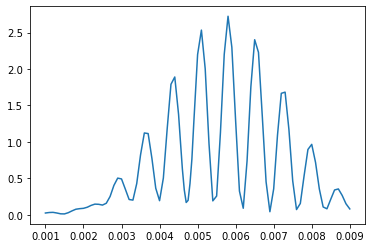

In [9]:
plt.plot(xa,ya)

In [10]:
I0 = 2.724
bp = 0.085e-3
hp = 0.457e-3
lam0 = 670e-9


#def Loren(I0, lam0, Gam, x) :
#    #I0 : 최대세기
#    #lam : 빛의 파장 중앙값
#    # Gam : 2*FHWM
#    # x : 변수 파장값
#    k = 2*np.pi/(lam)
#    h = 0.457*10**-3
#    L = 0.5
#    theta = x/L
#    #gam = 0.5*k*h*np.sin(theta)
#    return I0 * (Gam**2)/((x-lam0)**2+Gam**2)
#
#def mom(I0, lam0, Sigma, x, bp, hp) :
#    # I0 : 최대세기
#    # lam0 : 빛의 파장중심
#    # Gam : 2FWHM
#    # x : 변수 파장값
#    #b : 슬릿 폭
#    #hp : 슬릿 간격
#    beta = 0.5*k*bp*np.sin(theta)
#    gamma = 0.5*k*hp*np.sin(theta)
#    A = I0 * (Sigma**2)/((lam-lam0)**2+Sigma**2)
#    return A * (np.sin(beta)/beta)**2 * np.cos(gamma)**2
#
#
#def son(lam, theta, Sigma) :
#    k = 2*np.pi/lam
#    I0 = 2.724
#    beta = 0.5*k*bp*np.sin(theta)
#    gamma = 0.5*k*hp*np.sin(theta)
#    return I0 * Sigma**2 / ((lam-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2 * np.cos(gamma)**2
    
    
def Intall(xa, Sigma, I0, L, lam0) :
    theta = xa / L
    #I0 = 2.724
    bp = 0.085e-3
    hp = 0.457e-3
    #lam0 = 670e-9
    # 파장 0부터 
    a = lam0 - 300e-9
    b = lam0 + 300e-9
    n = 1000
    h = (b-a)/n

    lam = a
    k = 2*np.pi/lam
    beta = 0.5*k*bp*np.sin(theta)
    gamma = 0.5*k*hp*np.sin(theta)
    Ia = I0 * Sigma**2 / ((a-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2 * np.cos(gamma)**2
    #print(beta)
    lam = b
    k = 2*np.pi/lam
    beta = 0.5*k*bp*np.sin(theta)
    gamma = 0.5*k*hp*np.sin(theta)
    Ib = I0 * Sigma**2 / ((b-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2 * np.cos(gamma)**2
    #print(beta)
    I = 0.5*Ia + 0.5*Ib
    
    lam = a
    for i in range(n-1) :
        lam += h
        k = 2*np.pi/lam
        beta = 0.5*k*bp*np.sin(theta)
        gamma = 0.5*k*hp*np.sin(theta)
        I += I0 * Sigma**2 / ((lam-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2 * np.cos(gamma)**2
    sonInt = h*I
    #print(sonInt)
    #분자 적분 끝
    
    #분모 적분 시작
    h = (b-a)/n    
    Ia = I0 * Sigma**2 / ((a-lam0)**2+Sigma**2)
    Ib = I0 * Sigma**2 / ((b-lam0)**2+Sigma**2)
    I = 0.5*Ia + 0.5*Ib
    lam = a
    for i in range(n-1) :
        lam += h
        I += I0 * Sigma**2 / ((lam-lam0)**2+Sigma**2)
    momInt = h*I
    
    return sonInt/momInt


popt,pcov = curve_fit(Intall,xa,ya,p0=[1e-8,I0,0.5,lam0],bounds=([0,2.5,0.45,600e-9],[1e-7,3,0.55,740e-9]))
Dlam0arr.append(popt[3])
DSigmaarr.append(popt[0])
DIntenarr.append(popt[1])

In [11]:
popt 

array([1.00061618e-08, 2.72400000e+00, 4.99999996e-01, 6.62791706e-07])

0.9571173350173207


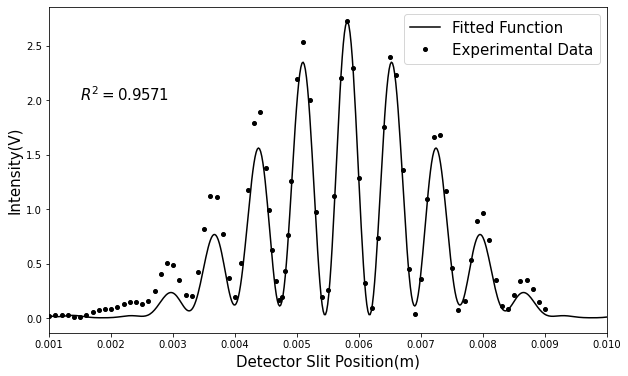

In [12]:
#x = np.linspace(-theta[-1],theta[-1],1000)
x = np.linspace(-xa[-1],xa[-1],1000)

fig = plt.figure(1,figsize=(10,6))
plt.plot(x+0.005807,I0*Intall(x,popt[0],popt[1],popt[2],popt[3]),color='black',label='Fitted Function')
plt.plot(xa,ya,'o',ms=4,color='black',label='Experimental Data')
plt.xlabel('Detector Slit Position(m)',fontsize=15)
plt.ylabel('Intensity(V)',fontsize=15)
plt.xlim(0.001,0.01)
plt.legend(fontsize=15)
r2 = r2_score(ya,I0*Intall(xa-0.005807,popt[0],popt[1],popt[2],popt[3]))
print(r2)
plt.text(0.0015,2,f'$R^2={r2:.4f}$',fontsize=15)
plt.savefig(savepath + 'Double_16')


# 16호 단일슬릿

## 왼쪽

In [13]:
Objpath = os.path.join(SPIpath,'Single16L.csv')
obj = ascii.read(Objpath,format='csv')
xa = obj['X']/1000
ya = obj['Y']/1000
theta = xa/0.5

In [14]:
I0 = np.max(ya)
bp = 0.085e-3
hp = 0.457e-3
lam0 = 670e-9

def Single(xa, Sigma, I0, lam0, bp, L) :
    #L = 0.5
    theta = xa / L
    #I0 = 2.724
    #bp = 0.085e-3
    #lam0 = 670e-9
    # 파장 0부터 
    a = lam0 - 500e-9
    b = lam0 + 500e-9
    n = 1000
    h = (b-a)/n
    
    lam = a
    k = 2*np.pi/lam
    beta = 0.5*k*bp*np.sin(theta)
    Ia = I0 * Sigma**2 / ((a-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2
    #print(beta)
    lam = b
    k = 2*np.pi/lam
    beta = 0.5*k*bp*np.sin(theta)
    gamma = 0.5*k*hp*np.sin(theta)
    Ib = I0 * Sigma**2 / ((b-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2
    #print(beta)
    I = 0.5*Ia + 0.5*Ib
    
    lam = a
    for i in range(n-1) :
        lam += h
        k = 2*np.pi/lam
        beta = 0.5*k*bp*np.sin(theta)
        gamma = 0.5*k*hp*np.sin(theta)
        I += I0 * Sigma**2 / ((lam-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2
    sonInt = h*I
    #print(sonInt)
    #분자 적분 끝
    
    #분모 적분 시작
    h = (b-a)/n    
    Ia = I0 * Sigma**2 / ((a-lam0)**2+Sigma**2)
    Ib = I0 *Sigma**2 / ((b-lam0)**2+Sigma**2)
    I = 0.5*Ia + 0.5*Ib
    lam = a
    for i in range(n-1) :
        lam += h
        I += I0 * Sigma**2 / ((lam-lam0)**2+Sigma**2)
    momInt = h*I
    
    return sonInt/momInt

popt,pcov = curve_fit(Single,xa,ya,p0=[1e-10,I0,lam0,0.081e-3,0.5],bounds=([1e-13,0.88,669e-9,0.08e-3,0.499],[1e-9,0.89,671e-9,0.083e-3,0.501]))
print(popt)

[1.00e-09 8.90e-01 6.69e-07 8.30e-05 4.99e-01]


In [15]:
perr = np.sqrt(np.diag(pcov))
perr

array([1.54061946e-06, 2.99191948e+06, 4.47739266e-04, 1.01590509e+00,
       5.77733047e+03])

0.9920770214006158


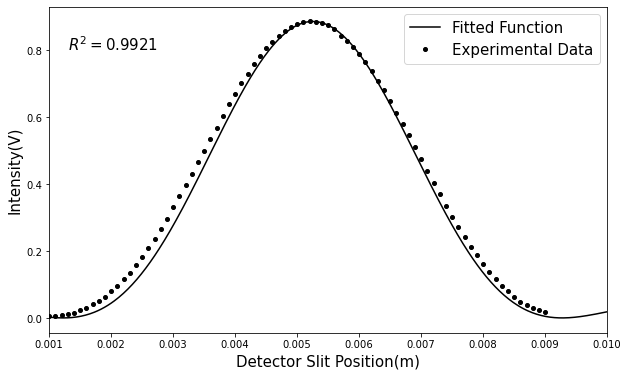

In [16]:
#x = np.linspace(-theta[-1],theta[-1],1000)
x = np.linspace(-xa[-1],xa[-1],1000)

fig = plt.figure(1,figsize=(10,6))
plt.plot(x+0.00525,I0 * Single(x,popt[0],popt[1],popt[2],popt[3],popt[4]),color='black',label='Fitted Function')
#plt.plot(x+0.00525,I0*Single(x,1e-11,I0,670e-9),color='black',label='Fitted Function')

plt.plot(xa, ya,'o',ms=4,color='black',label='Experimental Data')
plt.xlabel('Detector Slit Position(m)',fontsize=15)
plt.ylabel('Intensity(V)',fontsize=15)
plt.xlim(0.001,0.01)
plt.legend(fontsize=15)
r2 = r2_score(ya,I0 * Single(xa-0.00525,popt[0],popt[1],popt[2],popt[3],popt[4]))
print(r2)
plt.text(0.0013,0.8,f'$R^2={r2:.4f}$',fontsize=15)
plt.savefig(savepath + 'Single_16L')


## 오른쪽

In [17]:
Objpath = os.path.join(SPIpath,'Single16R.csv')
obj = ascii.read(Objpath,format='csv')
xa = obj['X']/1000
ya = obj['Y']/1000
theta = xa/0.5

In [18]:
I0 = np.max(ya)
bp = 0.085e-3
lam0 = 670e-9

def Single(xa, Sigma, I0, lam0, bp) :
    L = 0.5
    theta = xa / L
    #I0 = 2.724
    #bp = 0.085e-3
    hp = 0.457e-3
    #lam0 = 670e-9
    # 파장 0부터 
    a = lam0 - 500e-9
    b = lam0 + 500e-9
    n = 10000
    h = (b-a)/n
    
    lam = a
    k = 2*np.pi/lam
    beta = 0.5*k*bp*np.sin(theta)
    Ia = I0 * Sigma**2 / ((a-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2
    #print(beta)
    lam = b
    k = 2*np.pi/lam
    beta = 0.5*k*bp*np.sin(theta)
    gamma = 0.5*k*hp*np.sin(theta)
    Ib = I0 * Sigma**2 / ((b-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2
    #print(beta)
    I = 0.5*Ia + 0.5*Ib
    
    lam = a
    for i in range(n-1) :
        lam += h
        k = 2*np.pi/lam
        beta = 0.5*k*bp*np.sin(theta)
        gamma = 0.5*k*hp*np.sin(theta)
        I += I0 * Sigma**2 / ((lam-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2
    sonInt = h*I
    #print(sonInt)
    #분자 적분 끝
    
    #분모 적분 시작
    h = (b-a)/n    
    Ia = I0 * Sigma**2 / ((a-lam0)**2+Sigma**2)
    Ib = I0 *Sigma**2 / ((b-lam0)**2+Sigma**2)
    I = 0.5*Ia + 0.5*Ib
    lam = a
    for i in range(n-1) :
        lam += h
        I += I0 * Sigma**2 / ((lam-lam0)**2+Sigma**2)
    momInt = h*I
    
    return sonInt/momInt

popt,pcov = curve_fit(Single,xa,ya,p0=[1e-9,I0,lam0,0.083e-3],bounds=([1e-10,0.59,669e-9,0.0829e-3],[1e-8,0.6,671e-9,0.0831e-3]))
print(popt)

[1.00000006e-10 5.90000000e-01 6.69000000e-07 8.31000000e-05]


0.9960852917954819


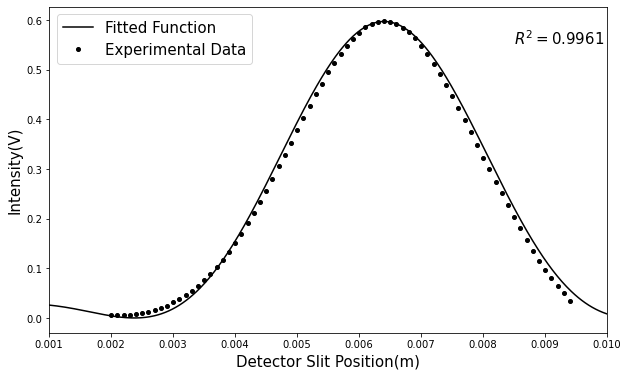

In [19]:
#x = np.linspace(-theta[-1],theta[-1],1000)
x = np.linspace(-xa[-1],xa[-1],1000)

fig = plt.figure(1,figsize=(10,6))
plt.plot(x+0.0064001,I0 * Single(x,popt[0],popt[1],popt[2],popt[3]),color='black',label='Fitted Function')
#plt.plot(x+0.00525,I0*Single(x,1e-11,I0,670e-9),color='black',label='Fitted Function')

plt.plot(xa, ya,'o',ms=4,color='black',label='Experimental Data')
plt.xlabel('Detector Slit Position(m)',fontsize=15)
plt.ylabel('Intensity(V)',fontsize=15)
plt.xlim(0.001,0.01)
plt.legend(fontsize=15)
r2 = r2_score(ya,I0 * Single(xa-0.006401,popt[0],popt[1],popt[2],popt[3]))
print(r2)
plt.text(0.0085,0.55,f'$R^2={r2:.4f}$',fontsize=15)
plt.savefig(savepath + 'Single_16R')


In [20]:
perr = np.sqrt(np.diag(pcov))
perr

array([5.71736156e-07, 1.45181169e+06, 4.69649910e-05, 5.82485781e-03])

In [21]:
5.7*10**-3

0.0057

# 15호 이중슬릿

In [22]:
Objpath = os.path.join(SPIpath,'Double15.csv')
obj = ascii.read(Objpath,format='csv')
xa = obj['X']/1000
ya = obj['Y']/1000
theta = xa/0.5

In [23]:
I0 = np.max(ya)
bp = 0.085e-3
hp = 0.406e-3
lam0 = 670e-9


#def Loren(I0, lam0, Gam, x) :
#    #I0 : 최대세기
#    #lam : 빛의 파장 중앙값
#    # Gam : 2*FHWM
#    # x : 변수 파장값
#    k = 2*np.pi/(lam)
#    h = 0.457*10**-3
#    L = 0.5
#    theta = x/L
#    #gam = 0.5*k*h*np.sin(theta)
#    return I0 * (Gam**2)/((x-lam0)**2+Gam**2)
#
#def mom(I0, lam0, Sigma, x, bp, hp) :
#    # I0 : 최대세기
#    # lam0 : 빛의 파장중심
#    # Gam : 2FWHM
#    # x : 변수 파장값
#    #b : 슬릿 폭
#    #hp : 슬릿 간격
#    beta = 0.5*k*bp*np.sin(theta)
#    gamma = 0.5*k*hp*np.sin(theta)
#    A = I0 * (Sigma**2)/((lam-lam0)**2+Sigma**2)
#    return A * (np.sin(beta)/beta)**2 * np.cos(gamma)**2
#
#
#def son(lam, theta, Sigma) :
#    k = 2*np.pi/lam
#    I0 = 2.724
#    beta = 0.5*k*bp*np.sin(theta)
#    gamma = 0.5*k*hp*np.sin(theta)
#    return I0 * Sigma**2 / ((lam-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2 * np.cos(gamma)**2
    
    
def Intall(xa, Sigma, I0, L, lam0) :
    theta = xa / L
    #I0 = 2.724
    bp = 0.085e-3
    hp = 0.406e-3
    #lam0 = 670e-9
    # 파장 0부터 
    a = lam0 - 600e-9
    b = lam0 + 600e-9
    n = 1000
    h = (b-a)/n

    lam = a
    k = 2*np.pi/lam
    beta = 0.5*k*bp*np.sin(theta)
    gamma = 0.5*k*hp*np.sin(theta)
    Ia = I0 * Sigma**2 / ((a-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2 * np.cos(gamma)**2
    
    lam = b
    k = 2*np.pi/lam
    beta = 0.5*k*bp*np.sin(theta)
    gamma = 0.5*k*hp*np.sin(theta)
    Ib = I0 * Sigma**2 / ((b-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2 * np.cos(gamma)**2
    
    I = 0.5*Ia + 0.5*Ib
    
    lam = a
    for i in range(n-1) :
        lam += h
        k = 2*np.pi/lam
        beta = 0.5*k*bp*np.sin(theta)
        gamma = 0.5*k*hp*np.sin(theta)
        I += I0 * Sigma**2 / ((lam-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2 * np.cos(gamma)**2
    sonInt = h*I
    #print(sonInt)
    #분자 적분 끝
    
    #분모 적분 시작
    h = (b-a)/n    
    Ia = I0 * Sigma**2 / ((a-lam0)**2+Sigma**2)
    Ib = I0 * Sigma**2 / ((b-lam0)**2+Sigma**2)
    I = 0.5*Ia + 0.5*Ib
    lam = a
    for i in range(n-1) :
        lam += h
        I += I0 * Sigma**2 / ((lam-lam0)**2+Sigma**2)
    momInt = h*I
    
    return sonInt/momInt


popt,pcov = curve_fit(Intall,xa,ya,p0=[1e-9,I0,0.5,lam0],bounds=([1e-15,1.9,0.49,660e-9],[1e-8,2.1,0.51,680e-9]))
print(popt)
r2 = r2_score(ya,I0*Intall(xa-0.005451,popt[0],popt[1],popt[2],popt[3]))
print(r2)
Dlam0arr.append(popt[3])
DSigmaarr.append(popt[0])
DIntenarr.append(popt[1])

[9.24307602e-09 2.06900000e+00 4.99999991e-01 6.60929831e-07]
0.9255668260326775


0.9255668260326775


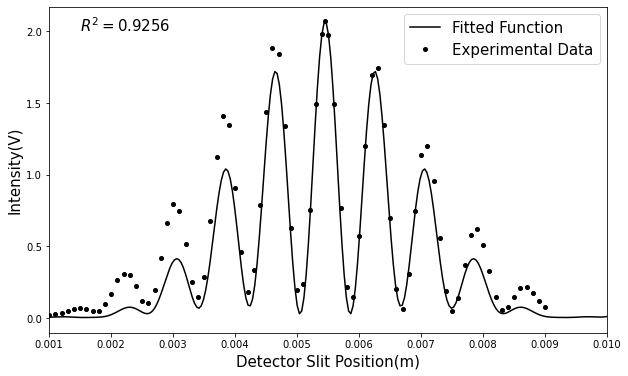

In [24]:
#x = np.linspace(-x[-1],xa[-1],1000)
x = np.linspace(-theta[-1],theta[-1],1000)

fig = plt.figure(1,figsize=(10,6))
#plt.plot(x+0.005451,I0*Intall(x,popt[0],I0,0.5,670e-9),color='black',label='Fitted Function')
plt.plot(x+0.005451,I0*Intall(x,popt[0],popt[1],popt[2],popt[3]),color='black',label='Fitted Function')

plt.plot(xa,ya,'o',ms=4,color='black',label='Experimental Data')
plt.xlabel('Detector Slit Position(m)',fontsize=15)
plt.ylabel('Intensity(V)',fontsize=15)
plt.xlim(0.001,0.01)
r2 = r2_score(ya,I0*Intall(xa-0.005451,popt[0],popt[1],popt[2],popt[3]))
print(r2)
plt.text(0.0015,2,f'$R^2={r2:.4f}$',fontsize=15)
plt.legend(fontsize=15)
plt.savefig(savepath + 'Double_15')

# 15호 단일슬릿

## 왼쪽

In [25]:
Objpath = os.path.join(SPIpath,'Single15L.csv')
obj = ascii.read(Objpath,format='csv')
xa = obj['X']/1000
ya = obj['Y']/1000
theta = xa/0.5

In [26]:
I0 = np.max(ya)
bp = 0.085e-3
lam0 = 670e-9

def Single(xa, Sigma, I0, lam0, bp) :
    L = 0.5
    theta = xa / L
    #I0 = 2.724
    #bp = 0.085e-3
    hp = 0.457e-3
    #lam0 = 670e-9
    # 파장 0부터 
    a = lam0 - 500e-9
    b = lam0 + 500e-9
    n = 10000
    h = (b-a)/n
    
    lam = a
    k = 2*np.pi/lam
    beta = 0.5*k*bp*np.sin(theta)
    Ia = I0 * Sigma**2 / ((a-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2
    #print(beta)
    lam = b
    k = 2*np.pi/lam
    beta = 0.5*k*bp*np.sin(theta)
    gamma = 0.5*k*hp*np.sin(theta)
    Ib = I0 * Sigma**2 / ((b-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2
    #print(beta)
    I = 0.5*Ia + 0.5*Ib
    
    lam = a
    for i in range(n-1) :
        lam += h
        k = 2*np.pi/lam
        beta = 0.5*k*bp*np.sin(theta)
        gamma = 0.5*k*hp*np.sin(theta)
        I += I0 * Sigma**2 / ((lam-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2
    sonInt = h*I
    #print(sonInt)
    #분자 적분 끝
    
    #분모 적분 시작
    h = (b-a)/n    
    Ia = I0 * Sigma**2 / ((a-lam0)**2+Sigma**2)
    Ib = I0 *Sigma**2 / ((b-lam0)**2+Sigma**2)
    I = 0.5*Ia + 0.5*Ib
    lam = a
    for i in range(n-1) :
        lam += h
        I += I0 * Sigma**2 / ((lam-lam0)**2+Sigma**2)
    momInt = h*I
    
    return sonInt/momInt

popt,pcov = curve_fit(Single,xa,ya,p0=[1e-9,I0,lam0,0.083e-3],bounds=([1e-10,0.75,669e-9,0.08e-3],[1e-8,0.76,671e-9,0.085e-3]))
print(popt)

[1.00e-08 7.60e-01 6.69e-07 8.50e-05]


0.9809262422477542


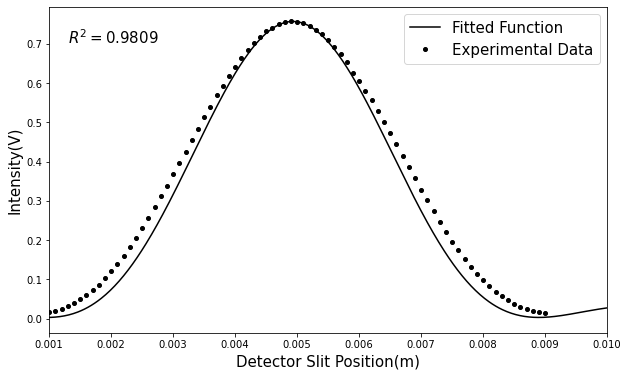

In [27]:
#x = np.linspace(-theta[-1],theta[-1],1000)
x = np.linspace(-xa[-1],xa[-1],1000)

fig = plt.figure(1,figsize=(10,6))
plt.plot(x+0.00493,I0 * Single(x,popt[0],popt[1],popt[2],popt[3]),color='black',label='Fitted Function')
#plt.plot(x+0.00525,I0*Single(x,1e-11,I0,670e-9),color='black',label='Fitted Function')

plt.plot(xa, ya,'o',ms=4,color='black',label='Experimental Data')
plt.xlabel('Detector Slit Position(m)',fontsize=15)
plt.ylabel('Intensity(V)',fontsize=15)
plt.xlim(0.001,0.01)
plt.legend(fontsize=15)
r2 = r2_score(ya,I0 * Single(xa-0.00493,popt[0],popt[1],popt[2],popt[3]))
print(r2)
plt.text(0.0013,0.7,f'$R^2={r2:.4f}$',fontsize=15)
plt.savefig(savepath + 'Single_15L')


In [28]:
perr = np.sqrt(np.diag(pcov))
perr

array([3.83378786e-07, 7.04166590e+05, 2.74646586e-05, 3.48679497e-03])

## 오른쪽

In [29]:
Objpath = os.path.join(SPIpath,'Single15R.csv')
obj = ascii.read(Objpath,format='csv')
xa = obj['X']/1000
ya = obj['Y']/1000
theta = xa/0.5

In [30]:
I0 = np.max(ya)
bp = 0.085e-3
lam0 = 670e-9

def Single(xa, Sigma, I0, lam0, L, bp) :
    #L = 0.5
    theta = xa / L
    #I0 = 2.724
    #bp = 0.085e-3
    hp = 0.457e-3
    #lam0 = 670e-9
    # 파장 0부터 
    a = lam0 - 500e-9
    b = lam0 + 500e-9
    n = 10000
    h = (b-a)/n
    
    lam = a
    k = 2*np.pi/lam
    beta = 0.5*k*bp*np.sin(theta)
    Ia = I0 * Sigma**2 / ((a-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2
    #print(beta)
    lam = b
    k = 2*np.pi/lam
    beta = 0.5*k*bp*np.sin(theta)
    gamma = 0.5*k*hp*np.sin(theta)
    Ib = I0 * Sigma**2 / ((b-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2
    #print(beta)
    I = 0.5*Ia + 0.5*Ib
    
    lam = a
    for i in range(n-1) :
        lam += h
        k = 2*np.pi/lam
        beta = 0.5*k*bp*np.sin(theta)
        gamma = 0.5*k*hp*np.sin(theta)
        I += I0 * Sigma**2 / ((lam-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2
    sonInt = h*I
    #print(sonInt)
    #분자 적분 끝
    
    #분모 적분 시작
    h = (b-a)/n    
    Ia = I0 * Sigma**2 / ((a-lam0)**2+Sigma**2)
    Ib = I0 *Sigma**2 / ((b-lam0)**2+Sigma**2)
    I = 0.5*Ia + 0.5*Ib
    lam = a
    for i in range(n-1) :
        lam += h
        I += I0 * Sigma**2 / ((lam-lam0)**2+Sigma**2)
    momInt = h*I
    
    return sonInt/momInt

popt,pcov = curve_fit(Single,xa,ya,p0=[1e-10,I0,lam0,0.5,0.085e-3],bounds=([1e-11,0.398,669e-9,0.4,0.083e-3],[1e-9,0.404,671e-9,0.6,0.085e-3]))
print(popt)

[1.00e-09 4.04e-01 6.69e-07 4.00e-01 8.50e-05]


0.9965629161605716


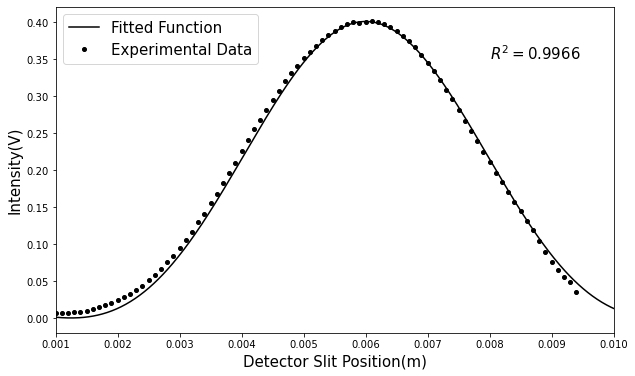

In [31]:
#x = np.linspace(-theta[-1],theta[-1],1000)
x = np.linspace(-xa[-1],xa[-1],1000)

fig = plt.figure(1,figsize=(10,6))
plt.plot(x+0.006,I0 * Single(x,popt[0],popt[1],popt[2],0.603,popt[4]),color='black',label='Fitted Function')
#plt.plot(x+0.006,I0*Single(x,1e-11,I0,670e-9,0.603),color='black',label='Fitted Function')

plt.plot(xa, ya,'o',ms=4,color='black',label='Experimental Data')
plt.xlabel('Detector Slit Position(m)',fontsize=15)
plt.ylabel('Intensity(V)',fontsize=15)
plt.xlim(0.001,0.01)
plt.legend(fontsize=15)
r2 = r2_score(ya,I0 * Single(xa-0.00601,popt[0],popt[1],popt[2],0.603,popt[4]))
#r2 = r2_score(ya,I0 * Single(xa-0.00601,1e-11,I0,670e-9,0.603))

print(r2)
plt.text(0.008,0.35,f'$R^2={r2:.4f}$',fontsize=15)
plt.savefig(savepath + 'Single_15R')


In [32]:
perr = np.sqrt(np.diag(pcov))
perr

array([4.78860766e-07, 3.93807796e+05, 1.53544067e-04, 1.53244875e+03,
       3.44853346e-01])

# 14호 이중슬릿

In [33]:
Objpath = os.path.join(SPIpath,'Double14.csv')
obj = ascii.read(Objpath,format='csv')
xa = obj['X']/1000
ya = obj['Y']/1000
theta = xa/0.5

In [34]:
I0 = np.max(ya)
bp = 0.085e-3
hp = 0.356e-3
lam0 = 670e-9


#def Loren(I0, lam0, Gam, x) :
#    #I0 : 최대세기
#    #lam : 빛의 파장 중앙값
#    # Gam : 2*FHWM
#    # x : 변수 파장값
#    k = 2*np.pi/(lam)
#    h = 0.457*10**-3
#    L = 0.5
#    theta = x/L
#    #gam = 0.5*k*h*np.sin(theta)
#    return I0 * (Gam**2)/((x-lam0)**2+Gam**2)
#
#def mom(I0, lam0, Sigma, x, bp, hp) :
#    # I0 : 최대세기
#    # lam0 : 빛의 파장중심
#    # Gam : 2FWHM
#    # x : 변수 파장값
#    #b : 슬릿 폭
#    #hp : 슬릿 간격
#    beta = 0.5*k*bp*np.sin(theta)
#    gamma = 0.5*k*hp*np.sin(theta)
#    A = I0 * (Sigma**2)/((lam-lam0)**2+Sigma**2)
#    return A * (np.sin(beta)/beta)**2 * np.cos(gamma)**2
#
#
#def son(lam, theta, Sigma) :
#    k = 2*np.pi/lam
#    I0 = 2.724
#    beta = 0.5*k*bp*np.sin(theta)
#    gamma = 0.5*k*hp*np.sin(theta)
#    return I0 * Sigma**2 / ((lam-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2 * np.cos(gamma)**2
    
    
def Intall(xa, Sigma, I0, L, lam0) :
    theta = xa / L
    #I0 = 2.724
    bp = 0.085e-3
    hp = 0.356e-3
    #lam0 = 670e-9
    # 파장 0부터 
    a = lam0 - 200e-9
    b = lam0 + 200e-9
    n = 1000
    h = (b-a)/n

    lam = a
    k = 2*np.pi/lam
    beta = 0.5*k*bp*np.sin(theta)
    gamma = 0.5*k*hp*np.sin(theta)
    Ia = I0 * Sigma**2 / ((a-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2 * np.cos(gamma)**2
    
    lam = b
    k = 2*np.pi/lam
    beta = 0.5*k*bp*np.sin(theta)
    gamma = 0.5*k*hp*np.sin(theta)
    Ib = I0 * Sigma**2 / ((b-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2 * np.cos(gamma)**2
    
    I = 0.5*Ia + 0.5*Ib
    
    lam = a
    for i in range(n-1) :
        lam += h
        k = 2*np.pi/lam
        beta = 0.5*k*bp*np.sin(theta)
        gamma = 0.5*k*hp*np.sin(theta)
        I += I0 * Sigma**2 / ((lam-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2 * np.cos(gamma)**2
    sonInt = h*I
    #print(sonInt)
    #분자 적분 끝
    
    #분모 적분 시작
    h = (b-a)/n    
    Ia = I0 * Sigma**2 / ((a-lam0)**2+Sigma**2)
    Ib = I0 * Sigma**2 / ((b-lam0)**2+Sigma**2)
    I = 0.5*Ia + 0.5*Ib
    lam = a
    for i in range(n-1) :
        lam += h
        I += I0 * Sigma**2 / ((lam-lam0)**2+Sigma**2)
    momInt = h*I
    #print(sonInt/momInt)
    return sonInt/momInt


popt,pcov = curve_fit(Intall,xa,ya,p0=[1e-9,I0,0.5,lam0],bounds=([1e-12,3.5,0.4,665e-9],[1e-9,4,0.5,675e-9]))
print(popt)
r2 = r2_score(ya,I0*Intall(xa-0.005103,popt[0],popt[1],popt[2],popt[3]))
print(r2)
Dlam0arr.append(popt[3])
DSigmaarr.append(popt[0])
DIntenarr.append(popt[1])

[1.00000000e-09 3.50000036e+00 5.00000000e-01 6.75000000e-07]
0.9784624557124125


0.9784624557124125


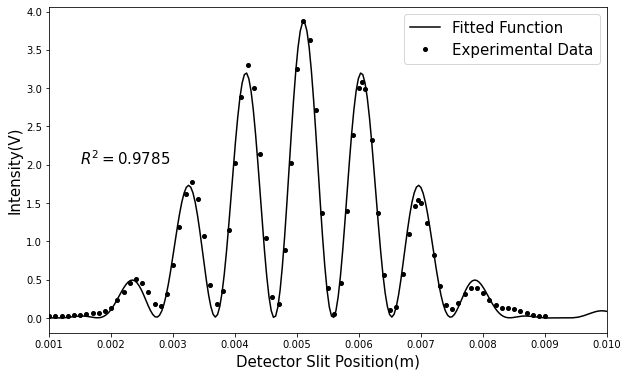

In [35]:
#x = np.linspace(-x[-1],xa[-1],1000)
x = np.linspace(-theta[-1],theta[-1],1000)

fig = plt.figure(1,figsize=(10,6))
#plt.plot(x+0.005451,I0*Intall(x,popt[0],I0,0.5,670e-9),color='black',label='Fitted Function')
plt.plot(x+0.005103,I0*Intall(x,popt[0],popt[1],popt[2],popt[3]),color='black',label='Fitted Function')

plt.plot(xa,ya,'o',ms=4,color='black',label='Experimental Data')
plt.xlabel('Detector Slit Position(m)',fontsize=15)
plt.ylabel('Intensity(V)',fontsize=15)
plt.xlim(0.001,0.01)
r2 = r2_score(ya,I0*Intall(xa-0.005103,popt[0],popt[1],popt[2],popt[3]))
print(r2)
plt.text(0.0015,2,f'$R^2={r2:.4f}$',fontsize=15)
plt.legend(fontsize=15)
plt.savefig(savepath + 'Double_14')

# 14호 단일슬릿

## 왼쪽

In [36]:
Objpath = os.path.join(SPIpath,'Single14L.csv')
obj = ascii.read(Objpath,format='csv')
xa = obj['X']/1000
ya = obj['Y']/1000
theta = xa/0.5

In [37]:
I0 = np.max(ya)
bp = 0.085e-3
lam0 = 670e-9

def Single(xa, Sigma, I0, lam0, bp) :
    L = 0.5
    theta = xa / L
    #I0 = 2.724
    #bp = 0.085e-3
    hp = 0.457e-3
    #lam0 = 670e-9
    # 파장 0부터 
    a = lam0 - 500e-9
    b = lam0 + 500e-9
    n = 10000
    h = (b-a)/n
    
    lam = a
    k = 2*np.pi/lam
    beta = 0.5*k*bp*np.sin(theta)
    Ia = I0 * Sigma**2 / ((a-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2
    #print(beta)
    lam = b
    k = 2*np.pi/lam
    beta = 0.5*k*bp*np.sin(theta)
    gamma = 0.5*k*hp*np.sin(theta)
    Ib = I0 * Sigma**2 / ((b-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2
    #print(beta)
    I = 0.5*Ia + 0.5*Ib
    
    lam = a
    for i in range(n-1) :
        lam += h
        k = 2*np.pi/lam
        beta = 0.5*k*bp*np.sin(theta)
        gamma = 0.5*k*hp*np.sin(theta)
        I += I0 * Sigma**2 / ((lam-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2
    sonInt = h*I
    #print(sonInt)
    #분자 적분 끝
    
    #분모 적분 시작
    h = (b-a)/n    
    Ia = I0 * Sigma**2 / ((a-lam0)**2+Sigma**2)
    Ib = I0 *Sigma**2 / ((b-lam0)**2+Sigma**2)
    I = 0.5*Ia + 0.5*Ib
    lam = a
    for i in range(n-1) :
        lam += h
        I += I0 * Sigma**2 / ((lam-lam0)**2+Sigma**2)
    momInt = h*I
    
    return sonInt/momInt

popt,pcov = curve_fit(Single,xa,ya,p0=[1e-9,I0,lam0,0.083e-3],bounds=([1e-10,1.314,669e-9,0.08e-3],[1e-8,1.319,671e-9,0.09e-3]))
print(popt)
Slam0arr.append(popt[2])
SSigmaarr.append(popt[0])
SIntenarr.append(popt[1])

[1.000e-08 1.319e+00 6.690e-07 9.000e-05]


0.9956261199071326


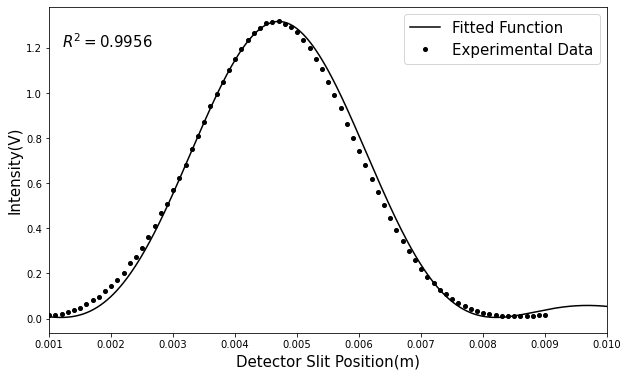

In [38]:
#x = np.linspace(-theta[-1],theta[-1],1000)
x = np.linspace(-xa[-1],xa[-1],1000)

fig = plt.figure(1,figsize=(10,6))
plt.plot(x+0.0047001,I0 * Single(x,popt[0],popt[1],popt[2],0.096e-3),color='black',label='Fitted Function')
#plt.plot(x+0.00525,I0*Single(x,1e-11,I0,670e-9),color='black',label='Fitted Function')

plt.plot(xa, ya,'o',ms=4,color='black',label='Experimental Data')
plt.xlabel('Detector Slit Position(m)',fontsize=15)
plt.ylabel('Intensity(V)',fontsize=15)
plt.xlim(0.001,0.01)
plt.legend(fontsize=15)
r2 = r2_score(ya,I0 * Single(xa-0.0047001,popt[0],popt[1],popt[2],0.096e-3))
print(r2)
plt.text(0.0012,1.2,f'$R^2={r2:.4f}$',fontsize=15)
plt.savefig(savepath + 'Single_14L')


In [39]:
perr = np.sqrt(np.diag(pcov))
perr

array([5.55277468e-07, 1.73679252e+06, 4.55468679e-05, 6.11308241e-03])

## 오른쪽

In [40]:
Objpath = os.path.join(SPIpath,'Single14R.csv')
obj = ascii.read(Objpath,format='csv')
xa = obj['X']/1000
ya = obj['Y']/1000
theta = xa/0.5

In [41]:
I0 = np.max(ya)
#bp = 0.085e-3
lam0 = 670e-9

def Single(xa, Sigma, I0, lam0, bp) :
    L = 0.5
    theta = xa / L
    #I0 = 2.724
    #bp = 0.085e-3
    hp = 0.457e-3
    #lam0 = 670e-9
    # 파장 0부터 
    a = lam0 - 500e-9
    b = lam0 + 500e-9
    n = 10000
    h = (b-a)/n
    
    lam = a
    k = 2*np.pi/lam
    beta = 0.5*k*bp*np.sin(theta)
    Ia = I0 * Sigma**2 / ((a-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2
    #print(beta)
    lam = b
    k = 2*np.pi/lam
    beta = 0.5*k*bp*np.sin(theta)
    gamma = 0.5*k*hp*np.sin(theta)
    Ib = I0 * Sigma**2 / ((b-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2
    #print(beta)
    I = 0.5*Ia + 0.5*Ib
    
    lam = a
    for i in range(n-1) :
        lam += h
        k = 2*np.pi/lam
        beta = 0.5*k*bp*np.sin(theta)
        gamma = 0.5*k*hp*np.sin(theta)
        I += I0 * Sigma**2 / ((lam-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2
    sonInt = h*I
    #print(sonInt)
    #분자 적분 끝
    
    #분모 적분 시작
    h = (b-a)/n    
    Ia = I0 * Sigma**2 / ((a-lam0)**2+Sigma**2)
    Ib = I0 *Sigma**2 / ((b-lam0)**2+Sigma**2)
    I = 0.5*Ia + 0.5*Ib
    lam = a
    for i in range(n-1) :
        lam += h
        I += I0 * Sigma**2 / ((lam-lam0)**2+Sigma**2)
    momInt = h*I
    
    return sonInt/momInt

popt,pcov = curve_fit(Single,xa,ya,p0=[1e-9,I0,lam0,0.09e-3],bounds=([1e-10,0.93,669e-9,0.085e-3],[1e-8,0.938,671e-9,0.095e-3]))
print(popt)
Slam0arr.append(popt[2])
SSigmaarr.append(popt[0])
SIntenarr.append(popt[1])

[1.00e-08 9.30e-01 6.69e-07 9.50e-05]


0.997023461330761


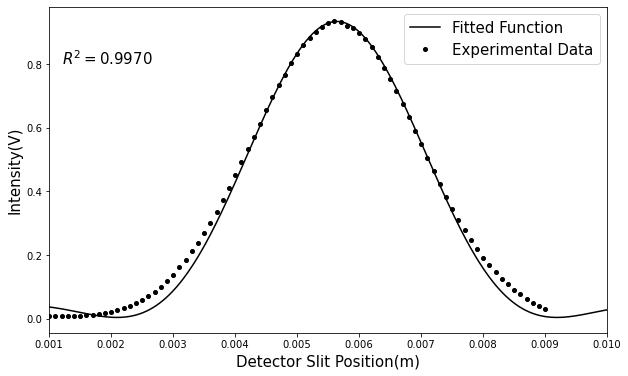

In [42]:
#x = np.linspace(-theta[-1],theta[-1],1000)
x = np.linspace(-xa[-1],xa[-1],1000)

fig = plt.figure(1,figsize=(10,6))
plt.plot(x+0.00564,I0 * Single(x,popt[0],popt[1],popt[2],popt[3]),color='black',label='Fitted Function')
#plt.plot(x+0.00525,I0*Single(x,1e-11,I0,670e-9),color='black',label='Fitted Function')

plt.plot(xa, ya,'o',ms=4,color='black',label='Experimental Data')
plt.xlabel('Detector Slit Position(m)',fontsize=15)
plt.ylabel('Intensity(V)',fontsize=15)
plt.xlim(0.001,0.01)
plt.legend(fontsize=15)
r2 = r2_score(ya,I0 * Single(xa-0.00564,popt[0],popt[1],popt[2],0.091e-3))
print(r2)
plt.text(0.0012,0.8,f'$R^2={r2:.4f}$',fontsize=15)
plt.savefig(savepath + 'Single_14R')


In [43]:
perr = np.sqrt(np.diag(pcov))
perr

array([4.02006733e-07, 1.14513224e+06, 3.23175282e-05, 4.58035506e-03])

# 14호 비대칭성

In [44]:
mean = np.mean(xa)

In [45]:
Objpath = os.path.join(SPIpath,'asymmetric_14_1.csv')
obj1 = ascii.read(Objpath,format='csv')
xa1 = obj1['X']/1000 - 0.00449
ya1 = obj1['Y']/1000
theta1 = xa1/0.5

Objpath = os.path.join(SPIpath,'asymmetric_14_2.csv')
obj2 = ascii.read(Objpath,format='csv')
xa2 = obj2['X']/1000 - 0.00449
ya2 = obj2['Y']/1000
theta2 = xa2/0.5

Objpath = os.path.join(SPIpath,'asymmetric_14_3.csv')
obj3 = ascii.read(Objpath,format='csv')
xa3 = obj3['X']/1000 - 0.00449
ya3 = obj3['Y']/1000
theta3 = xa3/0.5

In [46]:
I0 = np.max(ya)
bp = 0.085e-3
hp = 0.356e-3
lam0 = 670e-9

    
def Intall(xa, bp1, bp2, A, B, phi) :
    L = 0.43
    theta = xa / L
    #I0 = 2.724
    bp1 = 0.085e-3
    hp = 0.356e-3
    lam0 = 670e-9
    # 파장 0부터 
    k = 2*np.pi/lam0
    beta1 = 0.5*k*bp1*np.sin(theta)
    beta2 = 0.5*k*bp2*np.sin(theta)
    
    
    H1 = A**2 * (np.sin(beta1)/beta1)**2 
    H2 = B**2 * (np.sin(beta2)/beta2)**2 
    H3 = 2*A*B*(np.sin(beta1)*np.sin(beta2))/(beta1*beta2)*np.cos(k*hp*np.sin(theta+phi))
    
    return H1 + H2 + H3 

popt1,pcov1 = curve_fit(Intall,xa1,ya1,p0=[0.085e-3, 0.07e-3, 1 , 1,1],bounds=([1e-5,1e-5, 0, 0,0],[0.085e-2,0.085e-2, 10, 10,3.14]))
popt2,pcov2 = curve_fit(Intall,xa2,ya2,p0=[0.085e-3, 0.07e-3, 1 , 1,1],bounds=([1e-5,1e-5, 0, 0,0],[0.085e-2,0.085e-2, 10, 10,3.14]))
popt3,pcov3 = curve_fit(Intall,xa3,ya3,p0=[0.085e-3, 0.07e-3, 1 , 1,1],bounds=([1e-5,1e-5, 0, 0,0],[0.085e-2,0.085e-2, 10, 10,3.14]))

print(popt2)

[8.50000000e-05 2.83094976e-04 1.16455349e+00 1.85866042e-01
 1.00105298e+00]


0.9646864232116762 0.9552803295146133 0.9006808867311743


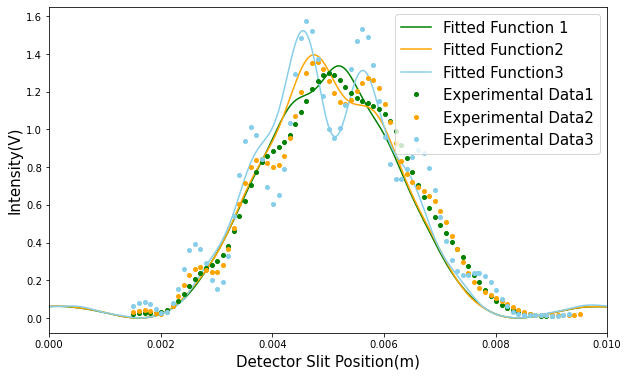

In [47]:
x = np.linspace(-theta[-1],theta[-1],10000)
fig = plt.figure(1,figsize=(10,6))
plt.plot(x+mean,Intall(x,popt1[0],popt1[1],popt1[2],popt1[3],popt1[4]),color='green',label='Fitted Function 1')
plt.plot(x+mean,Intall(x,popt3[0],popt3[1],popt3[2],popt3[3],popt3[4]),color='orange',label='Fitted Function2')
plt.plot(x+mean,Intall(x,popt2[0],popt2[1],popt2[2],popt2[3],popt2[4]),color='skyblue',label='Fitted Function3')


#plt.plot(x,Intall(x,popt[0],popt[1],1,0.5,1.1),color='black',label='Fitted Function')

plt.plot(xa1+mean,ya1,'o',ms=4,color='green',label='Experimental Data1')
plt.plot(xa3+mean,ya3,'o',ms=4,color='orange',label='Experimental Data2')
plt.plot(xa2+mean,ya2,'o',ms=4,color='skyblue',label='Experimental Data3')

plt.xlabel('Detector Slit Position(m)',fontsize=15)
plt.ylabel('Intensity(V)',fontsize=15)
plt.xlim(0,0.01)
r2_1 = r2_score(ya1,Intall(xa1,popt1[0],popt1[1],popt1[2],popt1[3],popt1[4]))
r2_3 = r2_score(ya2,Intall(xa2,popt2[0],popt2[1],popt2[2],popt2[3],popt2[4]))
r2_2 = r2_score(ya3,Intall(xa3,popt3[0],popt3[1],popt3[2],popt3[3],popt3[4]))

print(r2_1,r2_2,r2_3)
#plt.text(0.0015,2,f'$R^2={r2:.4f}$',fontsize=15)
plt.legend(fontsize=15)
plt.savefig(savepath + 'asymmetric_14')

# Lorentzian 계산

In [48]:
Slam0arr

[6.690000000000001e-07, 6.690000000000001e-07]

In [49]:
Dlam0arr
DSigmaarr

[1.000616181839648e-08, 9.243076024402165e-09, 9.999999999999922e-10]

In [50]:
Lam = 0.25*np.mean(Slam0arr) + 0.75*np.mean(Dlam0arr)
Sigma = 0.25*np.mean(SSigmaarr) + 0.75*np.mean(DSigmaarr)
Inten = 0.25*np.mean(SIntenarr) + 0.75*np.mean(DIntenarr)
Sigma

7.56230946069966e-09

In [51]:
Lam

6.669303842965369e-07

In [52]:
Sigma

7.56230946069966e-09

In [53]:
lam0

6.7e-07

In [54]:
c = 299792458
k = Lam**2/(c*Sigma)*1e9
print(f'{k:.5e}')

1.96194e-04


In [55]:
h = 6.62607015*1e-34
c = 299792458
P = 0.001
ans = (P*670e-9)/(h*c)
print(f'{1/ans*1e9:.5e}')

2.96484e-07


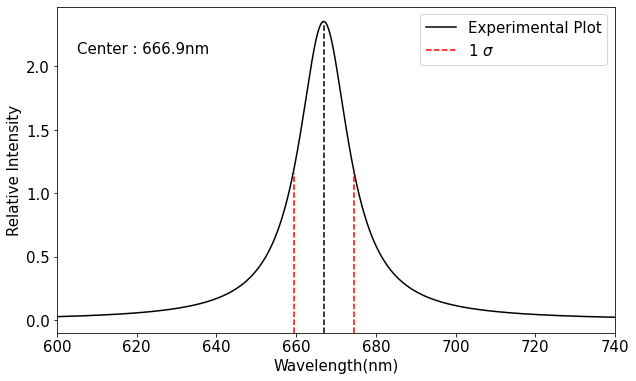

In [56]:
def Lo(Lam, Lam0, Sigma) :
    return Inten * Sigma**2/((Lam - Lam0)**2+Sigma**2)

fig = plt.figure(1,figsize=(10,6))
xx = np.linspace(600e-9,750e-9,1000)
plt.plot(xx,Lo(xx,Lam,Sigma),color='black',label='Experimental Plot')
plt.xlim(600e-9,740e-9)
plt.legend(fontsize=15)
plt.xlabel('Wavelength(nm)',fontsize=15)
plt.ylabel('Relative Intensity',fontsize=15)
plt.axvline(Lam,0,0.95,color='black',linestyle='--')
plt.axvline(Lam+Sigma,0,0.49,color='red',linestyle='--',label='1 $\sigma$')
plt.axvline(Lam-Sigma,0,0.49,color='red',linestyle='--')
plt.legend(fontsize=15)
plt.xticks([6e-7,6.2e-7,6.4e-7,6.6e-7,6.8e-7,7.0e-7,7.2e-7,7.4e-7],[600,620,640,660,680,700,720,740],fontsize=15)
plt.yticks(fontsize=15)
plt.text(605e-9,2.1,f'Center : {Lam*1e9:.1f}nm',fontsize=15)
plt.savefig(savepath + 'Wavelength Fitted.png')
plt.show()

In [57]:
print(f'파장 값은 {Lam*1e9:.2f} +- {Sigma*1e9:.2f}')

파장 값은 666.93 +- 7.56


# PMT

In [58]:
Dlam0arr = []
DSigmaarr = []
DIntenarr = []
Slam0arr = []
SSigmaarr = []
SIntenarr = []

## 상한

In [ ]:
sin

In [59]:
Objpath = os.path.join(SPIpath,'PMTup.csv')
obj = ascii.read(Objpath,format='csv')
x = obj['X']
y = obj['Y']
logy = np.log10(y)
#plt.plot(x,y,'o')
#plt.yscale('log')

In [60]:
for i in range(7) :
    logy[i] = 0
fitlogy = logy[7:-2]
fitx = x[7:-2]

0.9875535035885024
Xinerr는 4.490588218334324
Upper Bound is 545.01


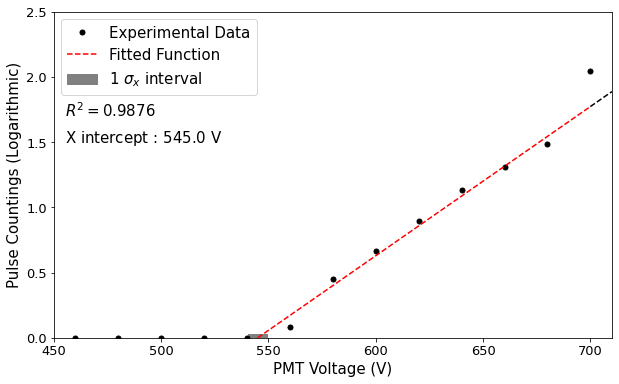

In [61]:
def fit(x,a,b) :
    return a*x + b
xx = np.linspace(545,700,1000)
xxx = np.linspace(700,1000,2000)
popt,pcov = curve_fit(fit,fitx,fitlogy)
r2 = r2_score(fitlogy,fit(fitx,popt[0],popt[1]))
print(r2)
Xin = -popt[1]/popt[0]

temp = 0 
for i in range(len(fitx)) :
    temp += np.abs(fitlogy[i]-fit(fitx[i],popt[0],popt[1]))**2
    #print(temp)
    
err = np.sqrt(temp/len(fitx))

Xinerr = np.abs(Xin-(-popt[1]-err)/popt[0])
print(f'Xinerr는 {Xinerr}')
fig = plt.figure(1,figsize=(10,6))
plt.plot(xxx,fit(xxx,popt[0],popt[1]),linestyle='--',color='black')
plt.plot(x,logy,'o',ms=5,color='black',label='Experimental Data')
plt.plot(xx,fit(xx,popt[0],popt[1]),linestyle='--',color='red',label='Fitted Function')
plt.ylim(0,2.5)
plt.xlim(450,710)
plt.xlabel('PMT Voltage (V)',fontsize=15)
plt.ylabel('Pulse Countings (Logarithmic)',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
print(f'Upper Bound is {-popt[1]/popt[0]:.2f}')
plt.text(455,1.7,f'$R^2={r2:.4f}$',fontsize=15)
plt.text(455,1.5,f'X intercept : ${Xin:.1f}$ V',fontsize=15)
plt.fill([Xin-Xinerr,Xin-Xinerr,Xin+Xinerr,Xin+Xinerr],[0,0.03,0.03,0],color='gray',label='1 $\sigma_x$ interval')
plt.legend(fontsize=15)
plt.savefig(savepath + 'PMTUpbound.png')
plt.show()

# 하한

In [62]:
Objpath = os.path.join(SPIpath,'PMTdown.csv')
obj = ascii.read(Objpath,format='csv')
x = obj['X']
y = obj['Y']
logy = np.log10(y)
fitlogy = logy[0:3]
fitx = x[0:3]

#plt.plot(x,y,'o')
#plt.yscale('log')

0.9981539690920497
Xerr는 0.7022715601813161


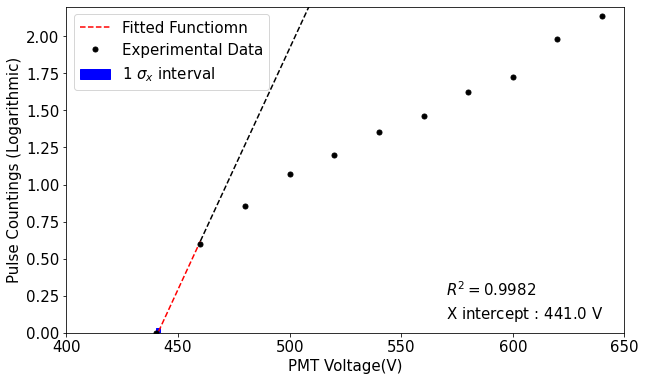

In [63]:
popt,pcov = curve_fit(fit, fitx, fitlogy)
xx = np.linspace(420,460,1000)
xxx = np.linspace(460,650,1000)
r2 = r2_score(fitlogy,fit(fitx,popt[0],popt[1]))
print(r2)
Xin = -popt[1]/popt[0]

temp = 0 
for i in range(len(fitx)) :
    temp += np.abs(fitlogy[i]-fit(fitx[i],popt[0],popt[1]))**2
    #print(temp)
    
err = np.sqrt(temp/len(fitx))

Xinerr = np.abs(Xin-(-popt[1]-err)/popt[0])

print(f'Xerr는 {Xinerr}')
fig = plt.figure(1,figsize=(10,6))
plt.plot(xxx,fit(xxx,popt[0],popt[1]),color='black',linestyle='--')
plt.plot(xx,fit(xx,popt[0],popt[1]),color='red',linestyle='--',label='Fitted Functiomn')
plt.plot(x,logy,'o',color='black',ms=5,label='Experimental Data')
plt.xlim(400,650)
plt.ylim(-0,2.2)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('PMT Voltage(V)',fontsize=15)
plt.ylabel('Pulse Countings (Logarithmic)',fontsize=15)
plt.text(570,0.25,f'$R^2={r2:.4f}$',fontsize=15)
plt.text(570,0.1,f'X intercept : ${Xin:.1f}$ V',fontsize=15)
plt.fill([Xin-Xinerr,Xin-Xinerr,Xin+Xinerr,Xin+Xinerr],[0,0.03,0.03,0],color='blue',label='1 $\sigma_x$ interval')
plt.legend(fontsize=15)
plt.savefig(savepath + 'PMTlowerbound.png')
plt.show()

# E-1 실험

In [64]:
Objpath = os.path.join(SPIpath,'PMT_E_1.csv')
obj = ascii.read(Objpath,format='csv')
x = obj['X']/1000
y = obj['Y']
err = obj['Std']

######

x = x[:50]
y = y[:50]
err = err[:50]

In [65]:
#def fit(x,a,b,c) :
#    return a*x**2+b*x+c

#def fit(x, H, A, x0, sigma):
#    return H + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def fit(x,a,b,c) :
    return a*x**2 + b*x + c

p,pcov = curve_fit(fit,x,y,maxfev=1000000,sigma=err)

xx = np.linspace(0.0001,0.009,1000)

r2 = r2_score(y,fit(x,p[0],p[1],p[2]))
xcenter = xx[np.where(fit(xx,p[0],p[1],p[2]) == np.max(fit(xx,p[0],p[1],p[2])))]*1000
xcenteridx = np.where(fit(xx,p[0],p[1],p[2]) == np.max(fit(xx,p[0],p[1],p[2])))
peak_x = xx[xcenteridx]
peak_y = fit(peak_x,p[0],p[1],p[2])

print(r2)
print(xcenter)

0.9808417978722157
[3.51211211]


In [66]:
perr = np.sqrt(np.diag(pcov))
au = ufloat(p[0],perr[0])
bu = ufloat(p[1],perr[1])
realerr = (-bu/(2*au)).s

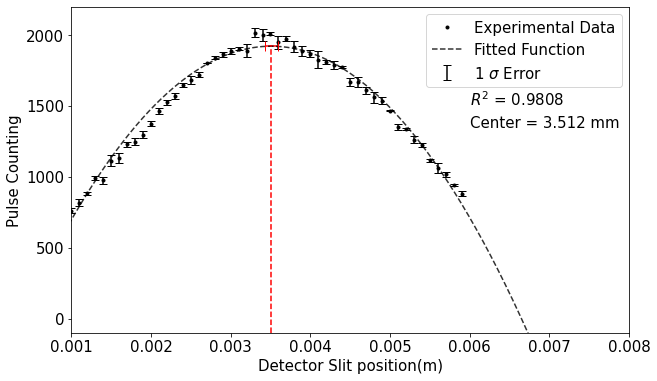

In [67]:
fig = plt.figure(1,figsize=(10,6))
plt.plot(x,y,'o',color='black',ms=3,label='Experimental Data')
plt.plot(xx,fit(xx,p[0],p[1],p[2]),color='black',linestyle='--',label='Fitted Function',alpha=0.8)
plt.errorbar(x,y,yerr=err,linestyle='None',capsize=4,color='black',label='1 $\sigma$ Error')
plt.xlabel('Detector Slit position(m)',fontsize=15)
plt.ylabel('Pulse Counting',fontsize=15)
plt.xlim(0.001,0.008)
plt.ylim(-100,2200)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.text(0.006,1500,f'$R^2$ = {r2:.4f}',fontsize=15)
plt.text(0.006,1350,f'Center = {xcenter[0]:.3f} mm',fontsize=15)
plt.axvline(xcenter/1000,0,0.883,linestyle='--',color='red')
#plt.axvline(xcenter/1000-realerr)
plt.errorbar(peak_x,peak_y,xerr=realerr,color='red',capsize=5)
plt.savefig(savepath + 'PMT_E_1.png')

plt.show()

In [68]:
print(f'peak의 위치는 {peak_x[0]*1000:.3f} $\pm$ {realerr*1000:.3f}$')

peak의 위치는 3.512 $\pm$ 0.085$


# E-2 실험

In [69]:
Objpath = os.path.join(SPIpath,'PMT_E_2.csv')
obj = ascii.read(Objpath,format='csv')
x = obj['X']/1000
y = obj['Y']
err = obj['Std']


In [70]:
#def fit(x,a,b,c) :
#    return a*x**2+b*x+c

#def fit(x, H, A, x0, sigma):
#    return H + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def fit(x,a,b,c) :
    return a*x**2 + b*x + c

#p,pcov = curve_fit(fit,x,y)
p,pcov = curve_fit(fit,x,y,maxfev=1000000)#bounds=([0,100,0.001,1e-5],[0.1,4000,0.006,10]))

xx = np.linspace(0.0001,0.009,10000)

r2 = r2_score(y,fit(x,p[0],p[1],p[2]))
#xcenter = xx[np.where(fit(xx,p[0],p[1],p[2],p[3]) == np.max(fit(xx,p[0],p[1],p[2],p[3])))]*1000
xcenter = p[2]
#std_left = p[2]-p[3]
#std_right = p[2]+p[3]

#print(idx_left,idx_right)
print(r2)
print(xcenter)


0.60257863482963
-22357.71285974483


In [71]:
xcenter = xx[np.where(fit(xx,p[0],p[1],p[2]) == np.max(fit(xx,p[0],p[1],p[2])))]*1000
xcenteridx = np.where(fit(xx,p[0],p[1],p[2]) == np.max(fit(xx,p[0],p[1],p[2])))
peak_x = xx[xcenteridx]
peak_y = fit(peak_x,p[0],p[1],p[2])

perr = np.sqrt(np.diag(pcov))
au = ufloat(p[0],perr[0])
bu = ufloat(p[1],perr[1])
realerr = (-bu/(2*au)).s

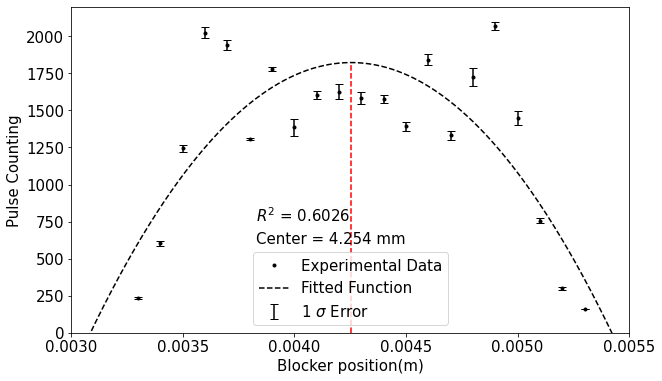

In [72]:
fig = plt.figure(1,figsize=(10,6))
plt.plot(x,y,'o',color='black',ms=3,label='Experimental Data')
plt.plot(xx,fit(xx,p[0],p[1],p[2]),color='black',linestyle='--',label='Fitted Function')
plt.errorbar(x,y,yerr=err,linestyle='None',capsize=4,color='black',label='1 $\sigma$ Error')
plt.xlabel('Blocker position(m)',fontsize=15)
plt.ylabel('Pulse Counting',fontsize=15)
plt.xlim(0.003,0.0055)
plt.ylim(0,2200)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.text(0.00383,750,f'$R^2$ = {r2:.4f}',fontsize=15)
plt.text(0.00383,600,f'Center = {xcenter[0]:.3f} mm',fontsize=15)
plt.axvline(xcenter[0]/1000,0,0.82,linestyle='--',color='red',)
#plt.fill_between(xx[idx_left:idx_right],fit(xx,p[0],p[1],p[2])[idx_left:idx_right],color='gray',label='i $\sigma$ interval')
plt.legend(fontsize=15)
#plt.errorbar(peak_x,peak_y,xerr=realerr,color='red',capsize=5)
plt.savefig(savepath + 'PMT_E_2.png')
plt.show()

In [73]:
print(f'peak의 값은 {peak_x[0]*1000:.3f} +- {realerr*1000:.3f}')

peak의 값은 4.254 +- 1.176


# E-3 실험

In [74]:
Objpath = os.path.join(SPIpath,'PMT_E_3.csv')
obj = ascii.read(Objpath,format='csv')
x = obj['X']
y = obj['Y']
err = obj['Std']

In [75]:
def fit(x,a,b,c) :
    return a*x**2+b*x+c

#p,pcov = curve_fit(fit,x,y)
p,pcov = curve_fit(fit,x,y,maxfev=1000000,sigma=err)

xx = np.linspace(0,9,100)

r2 = r2_score(y,fit(x,p[0],p[1],p[2]))
#xcenter = xx[np.where(fit(xx,p[0],p[1],p[2]) == np.max(fit(xx,p[0],p[1],p[2])))]*1000
print(r2)

0.8708438017839284


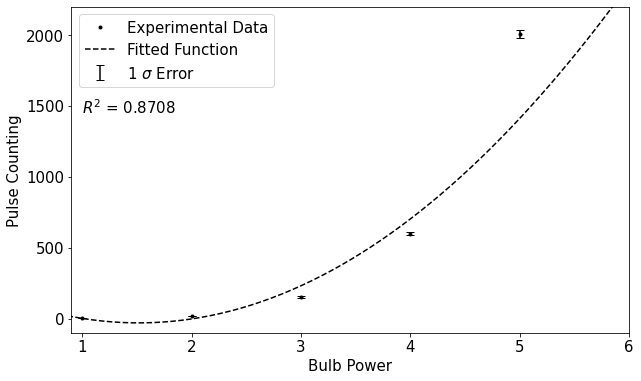

In [76]:
fig = plt.figure(1,figsize=(10,6))
plt.plot(x,y,'o',color='black',ms=3,label='Experimental Data')
plt.plot(xx,fit(xx,p[0],p[1],p[2]),color='black',linestyle='--',label='Fitted Function')
plt.errorbar(x,y,yerr=err,linestyle='None',capsize=4,color='black',label='1 $\sigma$ Error')
plt.xlabel('Bulb Power',fontsize=15)
plt.ylabel('Pulse Counting',fontsize=15)
plt.xlim(0.9,6)
plt.ylim(-100,2200)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.text(1,1450,f'$R^2$ = {r2:.4f}',fontsize=15)
#plt.text(0.0001,1300,f'Center = {xcenter[0]:.3f} mm',fontsize=15)
plt.savefig(savepath + 'PMT_E_3.png')
plt.show()

# F-1 단일슬릿 실험

# 왼쪽

In [77]:
Objpath = os.path.join(SPIpath,'PMT_F_1L.csv')
obj = ascii.read(Objpath,format='csv')
x = obj['X']/1000
y = obj['Y']
xa = x
ya = y
err = obj['Std']
theta = x/0.5

In [78]:
np.max(ya)

82.33333333

In [79]:
I0 = np.max(ya)
bp = 0.085e-3
lam0 = 546e-9

def Single(xa, Sigma, I0, lam0) :
    L = 0.5
    theta = xa / L
    #I0 = 2.724
    bp = 0.085e-3
    hp = 0.457e-3
    #lam0 = 670e-9
    # 파장 0부터 
    a = lam0 - 500e-9
    b = lam0 + 500e-9
    n = 10000
    h = (b-a)/n
    
    lam = a
    k = 2*np.pi/lam
    beta = 0.5*k*bp*np.sin(theta)
    Ia = I0 * Sigma**2 / ((a-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2
    #print(beta)
    lam = b
    k = 2*np.pi/lam
    beta = 0.5*k*bp*np.sin(theta)
    gamma = 0.5*k*hp*np.sin(theta)
    Ib = I0 * Sigma**2 / ((b-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2
    #print(beta)
    I = 0.5*Ia + 0.5*Ib
    
    lam = a
    for i in range(n-1) :
        lam += h
        k = 2*np.pi/lam
        beta = 0.5*k*bp*np.sin(theta)
        gamma = 0.5*k*hp*np.sin(theta)
        I += I0 * Sigma**2 / ((lam-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2
    sonInt = h*I
    #print(sonInt)
    #분자 적분 끝
    
    #분모 적분 시작
    h = (b-a)/n    
    Ia = I0 * Sigma**2 / ((a-lam0)**2+Sigma**2)
    Ib = I0 *Sigma**2 / ((b-lam0)**2+Sigma**2)
    I = 0.5*Ia + 0.5*Ib
    lam = a
    for i in range(n-1) :
        lam += h
        I += I0 * Sigma**2 / ((lam-lam0)**2+Sigma**2)
    momInt = h*I
    
    return sonInt/momInt

popt,pcov = curve_fit(Single,xa,ya,p0=[1e-8,I0,lam0],bounds=([1e-10,80,520e-9],[1e-8,85,590e-9]))
print(popt)
Slam0arr.append(popt[2])
SSigmaarr.append(popt[0])
SIntenarr.append(popt[1])

[1.0e-08 8.0e+01 5.9e-07]


In [80]:
perr = np.sqrt(np.diag(pcov))
print(perr)
pul1 = ufloat(popt[1],0.8)
pul1

[2.89644134e-05 8.58739460e-20 1.42805602e-05]


80.00000000914588+/-0.8

0.9589150403608241


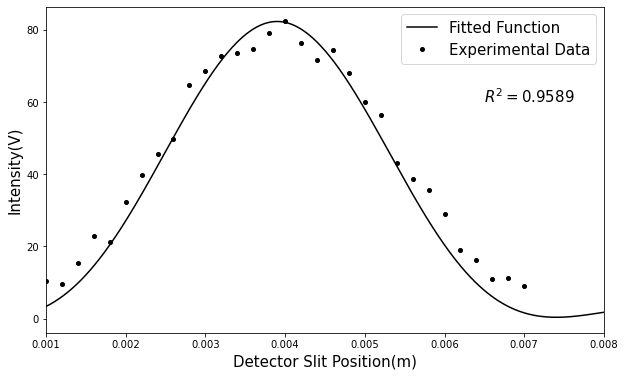

In [81]:
#x = np.linspace(-theta[-1],theta[-1],1000)
x = np.linspace(-xa[-1],xa[-1],1000)

fig = plt.figure(1,figsize=(10,6))
plt.plot(x+0.0039,I0 * Single(x,popt[0],popt[1],popt[2]),color='black',label='Fitted Function')
#plt.plot(x+0.00525,I0*Single(x,1e-11,I0,670e-9),color='black',label='Fitted Function')

plt.plot(xa, ya,'o',ms=4,color='black',label='Experimental Data')
plt.xlabel('Detector Slit Position(m)',fontsize=15)
plt.ylabel('Intensity(V)',fontsize=15)
plt.xlim(0.001,0.008)
plt.legend(fontsize=15)
r2 = r2_score(ya,I0 * Single(xa-0.0039,popt[0],popt[1],popt[2]))
print(r2)
plt.text(0.0065,60,f'$R^2={r2:.4f}$',fontsize=15)
plt.savefig(savepath + 'PMT_F_1L.png')


## 오른쪽

In [82]:
Objpath = os.path.join(SPIpath,'PMT_F_1R.csv')
obj = ascii.read(Objpath,format='csv')
x = obj['X']/1000
y = obj['Y']
xa = x
ya = y
err = obj['Std']
theta = x/0.5

In [83]:
I0 = np.max(ya)
bp = 0.085e-3
lam0 = 546e-9

def Single(xa, Sigma, I0, lam0) :
    L = 0.4
    theta = xa / L
    #I0 = 2.724
    bp = 0.085e-3
    hp = 0.457e-3
    #lam0 = 670e-9
    # 파장 0부터 
    a = lam0 - 500e-9
    b = lam0 + 500e-9
    n = 10000
    h = (b-a)/n
    
    lam = a
    k = 2*np.pi/lam
    beta = 0.5*k*bp*np.sin(theta)
    Ia = I0 * Sigma**2 / ((a-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2
    #print(beta)
    lam = b
    k = 2*np.pi/lam
    beta = 0.5*k*bp*np.sin(theta)
    gamma = 0.5*k*hp*np.sin(theta)
    Ib = I0 * Sigma**2 / ((b-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2
    #print(beta)
    I = 0.5*Ia + 0.5*Ib
    
    lam = a
    for i in range(n-1) :
        lam += h
        k = 2*np.pi/lam
        beta = 0.5*k*bp*np.sin(theta)
        gamma = 0.5*k*hp*np.sin(theta)
        I += I0 * Sigma**2 / ((lam-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2
    sonInt = h*I
    #print(sonInt)
    #분자 적분 끝
    
    #분모 적분 시작
    h = (b-a)/n    
    Ia = I0 * Sigma**2 / ((a-lam0)**2+Sigma**2)
    Ib = I0 *Sigma**2 / ((b-lam0)**2+Sigma**2)
    I = 0.5*Ia + 0.5*Ib
    lam = a
    for i in range(n-1) :
        lam += h
        I += I0 * Sigma**2 / ((lam-lam0)**2+Sigma**2)
    momInt = h*I
    
    return sonInt/momInt

popt,pcov = curve_fit(Single,xa,ya,p0=[1e-9,I0,lam0],bounds=([1e-10,0.40,500e-9],[1e-8,81,590e-9]))
print(popt)
Slam0arr.append(popt[2])
SSigmaarr.append(popt[0])
SIntenarr.append(popt[1])

[9.99999998e-09 4.00000133e-01 5.90000000e-07]


In [84]:
perr = np.sqrt(np.diag(pcov))
perr
pul2 = ufloat(popt[1],0.3)
pul2

0.40000013259557865+/-0.3

0.9083490827941455


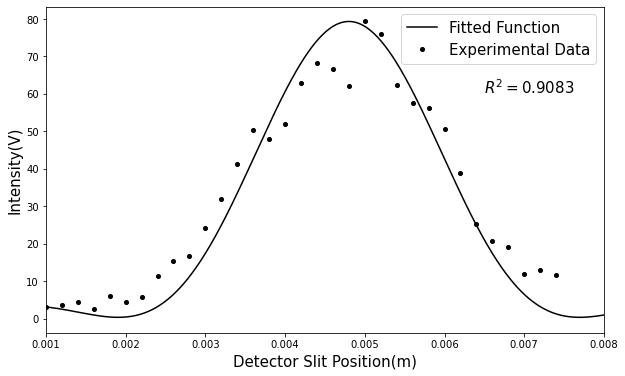

In [85]:
#x = np.linspace(-theta[-1],theta[-1],1000)
x = np.linspace(-xa[-1],xa[-1],1000)

fig = plt.figure(1,figsize=(10,6))
plt.plot(x+0.0048,I0 * Single(x,popt[0],popt[1],610e-9),color='black',label='Fitted Function')
#plt.plot(x+0.00525,I0*Single(x,1e-11,I0,670e-9),color='black',label='Fitted Function')

plt.plot(xa, ya,'o',ms=4,color='black',label='Experimental Data')
plt.xlabel('Detector Slit Position(m)',fontsize=15)
plt.ylabel('Intensity(V)',fontsize=15)
plt.xlim(0.001,0.008)
plt.legend(fontsize=15)
r2 = r2_score(ya,I0 * Single(xa-0.004801,popt[0],popt[1],popt[2]))
print(r2)
plt.text(0.0065,60,f'$R^2={r2:.4f}$',fontsize=15)
plt.savefig(savepath + 'PMT_F_1R.png')


In [86]:
pul1

80.00000000914588+/-0.8

In [87]:
pul2

0.40000013259557865+/-0.3

In [88]:
np.abs(pul1-pul2)

79.5999998765503+/-0.8544003745317532

In [89]:
err = np.abs(pul1-pul2)
print(err)
err.n/err.s

79.6+/-0.9


93.16475302363297

# F-3 실험

## Bulb 5

In [90]:
Objpath = os.path.join(SPIpath,'PMT_F_3_BULB5.csv')
obj5 = ascii.read(Objpath,format='csv')
x5 = obj5['X']/1000
x5 = x5[1:]
y5 = obj5['Y']
y5 = y5[1:]

err = obj5['Std']
theta = x/0.5

Objpath = os.path.join(SPIpath,'PMT_F_3_BULB4.csv')
obj4 = ascii.read(Objpath,format='csv')
x4 = obj4['X']/1000
y4 = obj4['Y']

err = obj4['Std']
theta = x/0.5

Objpath = os.path.join(SPIpath,'PMT_F_3_BULB3.csv')
obj3 = ascii.read(Objpath,format='csv')
x3 = obj3['X']/1000
y3 = obj3['Y']
idx = np.where(y3 == np.max(y3))
center = x3[idx]
x3 = x3 - center
#x3 = x3[:-10]
#y3 = y3[:-10]

err = obj3['Std']
theta = x/0.5

In [91]:
I05 = np.max(y5)
I04 = np.max(y4)
I03 = np.max(y3)

bp = 0.085e-3
hp = 0.356e-3
lam0 = 590e-9

def Intall(xa, Sigma, I0, L, lam0) :
    theta = xa / L
    #I0 = 2.724
    bp = 0.085e-3
    hp = 0.356e-3
    #lam0 = 670e-9
    # 파장 0부터 
    a = lam0 - 200e-9
    b = lam0 + 200e-9
    n = 1000
    h = (b-a)/n

    lam = a
    k = 2*np.pi/lam
    beta = 0.5*k*bp*np.sin(theta)
    gamma = 0.5*k*hp*np.sin(theta)
    Ia = I0 * Sigma**2 / ((a-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2 * np.cos(gamma)**2
    
    lam = b
    k = 2*np.pi/lam
    beta = 0.5*k*bp*np.sin(theta)
    gamma = 0.5*k*hp*np.sin(theta)
    Ib = I0 * Sigma**2 / ((b-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2 * np.cos(gamma)**2
    
    I = 0.5*Ia + 0.5*Ib
    
    lam = a
    for i in range(n-1) :
        lam += h
        k = 2*np.pi/lam
        beta = 0.5*k*bp*np.sin(theta)
        gamma = 0.5*k*hp*np.sin(theta)
        I += I0 * Sigma**2 / ((lam-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2 * np.cos(gamma)**2
    sonInt = h*I
    #print(sonInt)
    #분자 적분 끝
    
    #분모 적분 시작
    h = (b-a)/n    
    Ia = I0 * Sigma**2 / ((a-lam0)**2+Sigma**2)
    Ib = I0 * Sigma**2 / ((b-lam0)**2+Sigma**2)
    I = 0.5*Ia + 0.5*Ib
    lam = a
    for i in range(n-1) :
        lam += h
        I += I0 * Sigma**2 / ((lam-lam0)**2+Sigma**2)
    momInt = h*I
    
    return sonInt/momInt


p5,pcov = curve_fit(Intall,x5,y5,p0=([1e-10,I05,0.43,lam0]),bounds=([1e-12,320,0.4,520e-9],[1e-9,340,0.5,590e-9]))
p4,pcov = curve_fit(Intall,x4,y4,p0=([1e-10,I04,0.43,lam0]),bounds=([1e-12,130,0.4,520e-9],[1e-9,150,0.5,590e-9]))
p3,pcov = curve_fit(Intall,x3+0.0001,y3,p0=([1e-10,I03,0.43,lam0]),bounds=([1e-12,20,0.4,520e-9],[1e-9,35,0.5,590e-9]))

print(popt)
r2_5 = r2_score(y5,I05*Intall(x5-0.003801,p5[0],p5[1],p5[2],p5[3]))
r2_4 = r2_score(y4,I04*Intall(x4-0.003801,p4[0],p4[1],p4[2],p4[3]))
r2_3 = r2_score(y3,I03*Intall(x3+0.000001,p3[0],p3[1],p3[2],p3[3]))

print(f'{r2_5:.4f}')
print(f'{r2_4:.4f}')
print(f'{r2_3:.4f}')
#Dlam0arr.append(p5[3])
#DSigmaarr.append(p5[0])
#DIntenarr.append(p5[1])
#
#Dlam0arr.append(p4[3])
#DSigmaarr.append(p4[0])
#DIntenarr.append(p4[1])
#
#Dlam0arr.append(p3[3])
#DSigmaarr.append(p3[0])
#DIntenarr.append(p3[1])

[9.99999998e-09 4.00000133e-01 5.90000000e-07]
0.7438
0.8718
0.8045


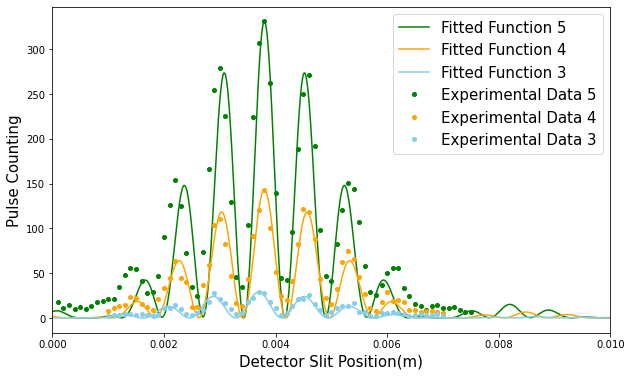

In [92]:
x = np.linspace(-theta[-1],theta[-1],10000)
fig = plt.figure(1,figsize=(10,6))
plt.plot(x+0.0038,I05*Intall(x,p5[0],p5[1],p5[2],p5[3]),color='green',label='Fitted Function 5')
plt.plot(x+0.0038,I04*Intall(x,p4[0],p4[1],p4[2],p4[3]),color='orange',label='Fitted Function 4')
plt.plot(x+center,I03*Intall(x,p3[0],p3[1],p3[2],p3[3]),color='skyblue',label='Fitted Function 3')

plt.plot(x5,y5,'o',ms=4,color='green',label='Experimental Data 5')
plt.plot(x4,y4,'o',ms=4,color='orange',label='Experimental Data 4')
plt.plot(x3+center,y3,'o',ms=4,color='skyblue',label='Experimental Data 3')

plt.xlabel('Detector Slit Position(m)',fontsize=15)
plt.ylabel('Pulse Counting',fontsize=15)
plt.xlim(0,0.01)
#r2 = r2_score(ya,I0*Intall(xa-0.005103,p5[0],p5[1],p5[2],p5[3]))
#plt.text(0.0015,2,f'$R^2={r2_5:.4f}$',fontsize=15)
plt.legend(fontsize=15)
plt.savefig(savepath + 'PMT_F_3.png')

In [93]:
lam

NameError: name 'lam' is not defined

In [ ]:
ans = 3.37/0.09*331*25*8000*110
print(f'{ans:.4e}')

ans * h * c / lam

# F-4 실험

# 14호

In [ ]:
Objpath = os.path.join(SPIpath,'PMT_F_3_BULB5.csv')
obj5 = ascii.read(Objpath,format='csv')
x5 = obj5['X']/1000
y5 = obj5['Y']

xa = x5[1:]
ya = y5[1:]
err = obj5['Std']
err = err[1:]
theta = x/0.5


In [ ]:
I0 = np.max(ya)
bp = 0.085e-3
hp = 0.356e-3
lam0 = 590e-9


#def Loren(I0, lam0, Gam, x) :
#    #I0 : 최대세기
#    #lam : 빛의 파장 중앙값
#    # Gam : 2*FHWM
#    # x : 변수 파장값
#    k = 2*np.pi/(lam)
#    h = 0.457*10**-3
#    L = 0.5
#    theta = x/L
#    #gam = 0.5*k*h*np.sin(theta)
#    return I0 * (Gam**2)/((x-lam0)**2+Gam**2)
#
#def mom(I0, lam0, Sigma, x, bp, hp) :
#    # I0 : 최대세기
#    # lam0 : 빛의 파장중심
#    # Gam : 2FWHM
#    # x : 변수 파장값
#    #b : 슬릿 폭
#    #hp : 슬릿 간격
#    beta = 0.5*k*bp*np.sin(theta)
#    gamma = 0.5*k*hp*np.sin(theta)
#    A = I0 * (Sigma**2)/((lam-lam0)**2+Sigma**2)
#    return A * (np.sin(beta)/beta)**2 * np.cos(gamma)**2
#
#
#def son(lam, theta, Sigma) :
#    k = 2*np.pi/lam
#    I0 = 2.724
#    beta = 0.5*k*bp*np.sin(theta)
#    gamma = 0.5*k*hp*np.sin(theta)
#    return I0 * Sigma**2 / ((lam-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2 * np.cos(gamma)**2
    
    
def Intall(xa, Sigma, I0, L, lam0) :
    theta = xa / L
    #I0 = 2.724
    bp = 0.085e-3
    hp = 0.356e-3
    #lam0 = 670e-9
    # 파장 0부터 
    a = lam0 - 100e-9
    b = lam0 + 100e-9
    n = 1000
    h = (b-a)/n

    lam = a
    k = 2*np.pi/lam
    beta = 0.5*k*bp*np.sin(theta)
    gamma = 0.5*k*hp*np.sin(theta)
    Ia = I0 * Sigma**2 / ((a-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2 * np.cos(gamma)**2
    
    lam = b
    k = 2*np.pi/lam
    beta = 0.5*k*bp*np.sin(theta)
    gamma = 0.5*k*hp*np.sin(theta)
    Ib = I0 * Sigma**2 / ((b-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2 * np.cos(gamma)**2
    
    I = 0.5*Ia + 0.5*Ib
    
    lam = a
    for i in range(n-1) :
        lam += h
        k = 2*np.pi/lam
        beta = 0.5*k*bp*np.sin(theta)
        gamma = 0.5*k*hp*np.sin(theta)
        I += I0 * Sigma**2 / ((lam-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2 * np.cos(gamma)**2
    sonInt = h*I
    #print(sonInt)
    #분자 적분 끝
    
    #분모 적분 시작
    h = (b-a)/n    
    Ia = I0 * Sigma**2 / ((a-lam0)**2+Sigma**2)
    Ib = I0 * Sigma**2 / ((b-lam0)**2+Sigma**2)
    I = 0.5*Ia + 0.5*Ib
    lam = a
    for i in range(n-1) :
        lam += h
        I += I0 * Sigma**2 / ((lam-lam0)**2+Sigma**2)
    momInt = h*I
    
    return sonInt/momInt


popt,pcov = curve_fit(Intall,xa,ya,p0=[1e-8,I0,0.43,lam0],bounds=([1e-9,320,0.42,530e-9],[1e-8,335,0.44,590e-9]))
print(popt)
r2 = r2_score(ya,I0*Intall(xa-0.0038001,popt[0],popt[1],0.43,popt[3]))
print(r2)
Dlam0arr.append(popt[3])
DSigmaarr.append(popt[0])
DIntenarr.append(popt[1])

In [ ]:
#x = np.linspace(-x[-1],xa[-1],1000)
x = np.linspace(-theta[-1],theta[-1],10000)

fig = plt.figure(1,figsize=(10,6))
#plt.plot(x+0.005451,I0*Intall(x,popt[0],I0,0.5,670e-9),color='black',label='Fitted Function')
#plt.plot(x+0.0043,I0*Intall(x,popt[0],popt[1],popt[2],popt[3]),color='black',label='Fitted Function')
plt.plot(x+0.00379001,I0*Intall(x,popt[0],popt[1],0.49,popt[3]),color='black',label='Fitted Function')

plt.plot(xa,ya,'o',ms=4,color='black',label='Experimental Data')
plt.xlabel('Detector Slit Position(m)',fontsize=15)
plt.ylabel('Pulse Counting',fontsize=15)
plt.xlim(0.001,0.007)
r2 = r2_score(ya,I0*Intall(xa-0.0038001,popt[0],popt[1],0.49,popt[3]))
print(r2)
plt.text(0.005,250,f'$R^2={r2:.4f}$',fontsize=15)
plt.legend(fontsize=15)
plt.savefig(savepath + 'PMT_Double_14')

# 15호

14호 0.356, 15호 0.406, 16호 0.457mm

In [ ]:
Objpath = os.path.join(SPIpath,'PMT_F_4_15.csv')
obj5 = ascii.read(Objpath,format='csv')
x5 = obj5['X']/1000
y5 = obj5['Y']
xa = x5[10:-15]
ya = y5[10:-15]-8
err = obj5['Std']
err = err[5:-15]
theta = x/0.5


In [ ]:
I0 = np.max(ya)
bp = 0.085e-3
hp = 0.406e-3
lam0 = 590e-9


#def Loren(I0, lam0, Gam, x) :
#    #I0 : 최대세기
#    #lam : 빛의 파장 중앙값
#    # Gam : 2*FHWM
#    # x : 변수 파장값
#    k = 2*np.pi/(lam)
#    h = 0.457*10**-3
#    L = 0.5
#    theta = x/L
#    #gam = 0.5*k*h*np.sin(theta)
#    return I0 * (Gam**2)/((x-lam0)**2+Gam**2)
#
#def mom(I0, lam0, Sigma, x, bp, hp) :
#    # I0 : 최대세기
#    # lam0 : 빛의 파장중심
#    # Gam : 2FWHM
#    # x : 변수 파장값
#    #b : 슬릿 폭
#    #hp : 슬릿 간격
#    beta = 0.5*k*bp*np.sin(theta)
#    gamma = 0.5*k*hp*np.sin(theta)
#    A = I0 * (Sigma**2)/((lam-lam0)**2+Sigma**2)
#    return A * (np.sin(beta)/beta)**2 * np.cos(gamma)**2
#
#
#def son(lam, theta, Sigma) :
#    k = 2*np.pi/lam
#    I0 = 2.724
#    beta = 0.5*k*bp*np.sin(theta)
#    gamma = 0.5*k*hp*np.sin(theta)
#    return I0 * Sigma**2 / ((lam-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2 * np.cos(gamma)**2
    
    
def Intall(xa, Sigma, I0, L, lam0) :
    theta = xa / L
    #I0 = 2.724
    bp = 0.085e-3
    hp = 0.406e-3
    #lam0 = 670e-9
    # 파장 0부터 
    a = lam0 - 100e-9
    b = lam0 + 100e-9
    n = 1000
    h = (b-a)/n

    lam = a
    k = 2*np.pi/lam
    beta = 0.5*k*bp*np.sin(theta)
    gamma = 0.5*k*hp*np.sin(theta)
    Ia = I0 * Sigma**2 / ((a-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2 * np.cos(gamma)**2
    
    lam = b
    k = 2*np.pi/lam
    beta = 0.5*k*bp*np.sin(theta)
    gamma = 0.5*k*hp*np.sin(theta)
    Ib = I0 * Sigma**2 / ((b-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2 * np.cos(gamma)**2
    
    I = 0.5*Ia + 0.5*Ib
    
    lam = a
    for i in range(n-1) :
        lam += h
        k = 2*np.pi/lam
        beta = 0.5*k*bp*np.sin(theta)
        gamma = 0.5*k*hp*np.sin(theta)
        I += I0 * Sigma**2 / ((lam-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2 * np.cos(gamma)**2
    sonInt = h*I
    #print(sonInt)
    #분자 적분 끝
    
    #분모 적분 시작
    h = (b-a)/n    
    Ia = I0 * Sigma**2 / ((a-lam0)**2+Sigma**2)
    Ib = I0 * Sigma**2 / ((b-lam0)**2+Sigma**2)
    I = 0.5*Ia + 0.5*Ib
    lam = a
    for i in range(n-1) :
        lam += h
        I += I0 * Sigma**2 / ((lam-lam0)**2+Sigma**2)
    momInt = h*I
    
    return sonInt/momInt


popt,pcov = curve_fit(Intall,xa,ya,p0=[1e-8,I0,0.5,lam0],bounds=([1e-9,45,0.4,530e-9],[1e-8,55,0.5,590e-9]))
print(popt)
print(r2)
Dlam0arr.append(popt[3])
DSigmaarr.append(popt[0])
DIntenarr.append(popt[1])

In [ ]:
#x = np.linspace(-x[-1],xa[-1],1000)
x = np.linspace(-0.1,0.1,10000)

fig = plt.figure(1,figsize=(10,6))
#plt.plot(x+0.005451,I0*Intall(x,popt[0],I0,0.5,670e-9),color='black',label='Fitted Function')
#plt.plot(x+0.0043,I0*Intall(x,popt[0],popt[1],popt[2],popt[3]),color='black',label='Fitted Function')
plt.plot(x+0.00436501,I0*Intall(x,popt[0],popt[1],0.48,popt[3]),color='black',label='Fitted Function')

plt.plot(xa,ya,'o',ms=4,color='black',label='Experimental Data')
plt.xlabel('Detector Slit Position(m)',fontsize=15)
plt.ylabel('Pulse Counting',fontsize=15)
plt.xlim(0.001,0.008)
r2 = r2_score(ya,I0*Intall(xa-0.00436501,popt[0],popt[1],0.48,popt[3]))
print(r2)
plt.text(0.006,38,f'$R^2={r2:.4f}$',fontsize=15)
plt.legend(fontsize=15)
plt.savefig(savepath + 'PMT_Double_15')

# 16호

In [ ]:
Objpath = os.path.join(SPIpath,'PMT_F_4_16.csv')
obj5 = ascii.read(Objpath,format='csv')
x5 = obj5['X']/1000
y5 = obj5['Y']
xa = x5[15:-15]
ya = y5[15:-15]-8
err = obj5['Std']
theta = xa/0.5


In [ ]:
I0 = np.max(ya)
bp = 0.085e-3
hp = 0.457e-3
lam0 = 590e-9


#def Loren(I0, lam0, Gam, x) :
#    #I0 : 최대세기
#    #lam : 빛의 파장 중앙값
#    # Gam : 2*FHWM
#    # x : 변수 파장값
#    k = 2*np.pi/(lam)
#    h = 0.457*10**-3
#    L = 0.5
#    theta = x/L
#    #gam = 0.5*k*h*np.sin(theta)
#    return I0 * (Gam**2)/((x-lam0)**2+Gam**2)
#
#def mom(I0, lam0, Sigma, x, bp, hp) :
#    # I0 : 최대세기
#    # lam0 : 빛의 파장중심
#    # Gam : 2FWHM
#    # x : 변수 파장값
#    #b : 슬릿 폭
#    #hp : 슬릿 간격
#    beta = 0.5*k*bp*np.sin(theta)
#    gamma = 0.5*k*hp*np.sin(theta)
#    A = I0 * (Sigma**2)/((lam-lam0)**2+Sigma**2)
#    return A * (np.sin(beta)/beta)**2 * np.cos(gamma)**2
#
#
#def son(lam, theta, Sigma) :
#    k = 2*np.pi/lam
#    I0 = 2.724
#    beta = 0.5*k*bp*np.sin(theta)
#    gamma = 0.5*k*hp*np.sin(theta)
#    return I0 * Sigma**2 / ((lam-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2 * np.cos(gamma)**2
    
    
def Intall(xa, Sigma, I0, L, lam0) :
    theta = xa / L
    #I0 = 2.724
    bp = 0.085e-3
    hp = 0.457e-3
    #lam0 = 670e-9
    # 파장 0부터 
    a = lam0 - 200e-9
    b = lam0 + 200e-9
    n = 1000
    h = (b-a)/n

    lam = a
    k = 2*np.pi/lam
    beta = 0.5*k*bp*np.sin(theta)
    gamma = 0.5*k*hp*np.sin(theta)
    Ia = I0 * Sigma**2 / ((a-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2 * np.cos(gamma)**2
    
    lam = b
    k = 2*np.pi/lam
    beta = 0.5*k*bp*np.sin(theta)
    gamma = 0.5*k*hp*np.sin(theta)
    Ib = I0 * Sigma**2 / ((b-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2 * np.cos(gamma)**2
    
    I = 0.5*Ia + 0.5*Ib
    
    lam = a
    for i in range(n-1) :
        lam += h
        k = 2*np.pi/lam
        beta = 0.5*k*bp*np.sin(theta)
        gamma = 0.5*k*hp*np.sin(theta)
        I += I0 * Sigma**2 / ((lam-lam0)**2+Sigma**2) * (np.sin(beta)/beta)**2 * np.cos(gamma)**2
    sonInt = h*I
    #print(sonInt)
    #분자 적분 끝
    
    #분모 적분 시작
    h = (b-a)/n    
    Ia = I0 * Sigma**2 / ((a-lam0)**2+Sigma**2)
    Ib = I0 * Sigma**2 / ((b-lam0)**2+Sigma**2)
    I = 0.5*Ia + 0.5*Ib
    lam = a
    for i in range(n-1) :
        lam += h
        I += I0 * Sigma**2 / ((lam-lam0)**2+Sigma**2)
    momInt = h*I
    
    return sonInt/momInt


popt,pcov = curve_fit(Intall,xa,ya,p0=[1e-8,I0,0.5,lam0],bounds=([1e-8,30,0.4,520e-9],[1e-7,70,0.5,590e-9]))
print(popt)
#print(r2)
Dlam0arr.append(popt[3])
DSigmaarr.append(popt[0])
DIntenarr.append(popt[1])

In [ ]:
#x = np.linspace(-x[-1],xa[-1],1000)
x = np.linspace(-0.01,0.01,10000)

fig = plt.figure(1,figsize=(10,6))
#plt.plot(x+0.00489,I0*Intall(x,popt[0],I0,0.5,670e-9),color='black',label='Fitted Function')
plt.plot(x+0.00491,I0*Intall(x,1e-8,41,0.48,590e-9),color='black',label='Fitted Function')

plt.plot(xa,ya,'o',ms=4,color='black',label='Experimental Data')
plt.xlabel('Detector Slit Position(m)',fontsize=15)
plt.ylabel('Pulse Counting',fontsize=15)
plt.xlim(0.002,0.008)
r2 = r2_score(ya,I0*Intall(xa-0.00491,popt[0],popt[1],0.48,popt[3]))
print(r2)
plt.text(0.0022,35,f'$R^2={r2:.4f}$',fontsize=15)
plt.legend(fontsize=15)
plt.savefig(savepath + 'PMT_Double_16')

# Bandwidth 역산

In [ ]:
#Dlam0arr = []
#DSigmaarr = []
#DIntenarr = []
#Slam0arr = []
#SSigmaarr = []
#SIntenarr = []

In [ ]:
lam = np.sum(Dlam0arr)*0.25 + np.sum(Slam0arr) * 0.125

In [ ]:
sigma = np.sum(DSigmaarr)*0.25 + np.sum(SSigmaarr) * 0.125
sigma

In [ ]:
Dlam0arr

In [ ]:
Slam0arr

In [ ]:
print(f'파장 값은 {lam*10**9:.2f} +- {sigma*10**9:.2f}')

In [ ]:
def Lo(Lam, Lam0, Sigma) :
    return Inten * Sigma**2/((Lam - Lam0)**2+Sigma**2)

fig = plt.figure(1,figsize=(10,6))
xx = np.linspace(500e-9,680e-9,1000)
plt.plot(xx,Lo(xx,lam,sigma),color='black',label='Experimental Plot')
plt.xlim(520e-9,660e-9)
plt.legend(fontsize=15)
plt.xlabel('Wavelength(nm)',fontsize=15)
plt.ylabel('Relative Intensity',fontsize=15)
plt.axvline(lam,0,0.95,color='black',linestyle='--')
plt.axvline(lam+sigma,0,0.49,color='red',linestyle='--',label='1 $\sigma$')
plt.axvline(lam-sigma,0,0.49,color='red',linestyle='--')
plt.legend(fontsize=15)
plt.xticks([5.2e-7,5.4e-7,5.6e-7,5.8e-7,6.0e-7,6.2e-7,6.4e-7],[520,540,560,580,600,620,640],fontsize=15)
plt.yticks(fontsize=15)
plt.text(615e-9,1.5,f'Center : {lam*1e9:.2f}nm',fontsize=15)
plt.savefig(savepath + 'PMT_Wavelength Fitted.png')
plt.show()

In [ ]:
lam**2/(c*sigma)

In [ ]:
P = 9.18*1e-8
h*c/(P*lam0)